# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

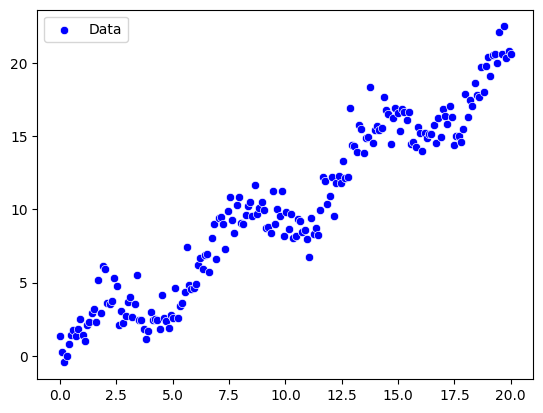

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([1.3754]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.1270]])]

In [8]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features)


In [9]:
in_features = 1
out_features = 1

model_2 = nn.Sequential(
    nn.Linear(in_features , 128),
    nn.ReLU(),
    nn.Linear(128 , 64),
    nn.ReLU(),
    nn.Linear(64,16),
    nn.ReLU(),
    nn.Linear(16 , out_features),
)

In [10]:
loss_fn = nn.MSELoss()

In [11]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [12]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



<ipython-input-12-f3caa4f47508>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

174.66302490234375
211.20112991333008
259.47583389282227
263.8718476295471
263.88074160926044
275.1966557633132
285.5152535568923
487.6219430100173
1092.8066353928298
1092.8101147629786
1238.7153119065333
1524.4040326096583
1743.0621289231349
1747.6792220093776
2136.0237349488307
2152.409381768899
2157.4876975037623
2383.738094232278
2531.159206292825
2732.7445487000514
2733.2480121471453
2753.0290332653094
2835.716701111989
3043.531657777028
3044.3792948343325
3240.052451572614
3321.6493296243716
3513.4649729349185
3638.9015116312075
4003.984427890973
4131.35549875279
4187.029994449811
4364.250651798444
4442.381923160749
4666.528117618756
4796.72288080235
5021.104579410749
5309.977351627545
5436.648539982038
5457.518969974713
5845.386889896588
6227.245196781354
6236.730802021222
6487.953427753644
6725.708035907941
6727.348919949727
6802.27147396584
6804.269194922643
6887.304213843541
6887.336910098093
6888.797850339906
7119.219206541078
7185.001448362367
7186.064163058298
7241.9171560

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.469177007675171
13.077399969100952
61.582355260849
91.21637892723083
94.60907769203186
97.73602676391602
103.67727518081665
180.35880136489868
261.87692880630493
297.85105752944946
306.75514364242554
380.3801817893982
407.63609647750854
441.0318064689636
441.75672644376755
475.93526953458786
503.4125892519951
563.9053031802177
616.0852653384209
694.6263877749443
771.2113181948662
771.7918954491615
814.9017358422279
831.7465062737465
845.1499248147011
886.7526050209999
955.3174625039101
984.2640185952187
985.1129843592644
1000.5045954585075
1000.7072386443615
1021.9556784331799
1084.2527899444103
1123.8315519988537
1165.782514065504
1177.7435345351696
1178.541909724474
1220.8052764236927
1297.0264602005482
1310.1467414200306
1348.6951384842396
1349.0891408026218
1351.0838886797428
1403.8867222368717
1456.6296841204166
1519.8547550737858
1544.420230537653
1568.843871742487
1604.090972572565
1715.922141700983
1769.1542393267155
1807.3957401812077
1882.7933994829655
1885.0131436884403
18

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4090159237384796
0.4090343328207382
64.49246939141449
64.95548867304024
172.7074570568293
179.41183852274116
180.5620461614817
285.52763759214577
306.2497140081614
346.34117137510475
362.4094811590403
437.91574489195045
478.35883723814186
510.8055459173411
515.1421834142893
515.615187218973
515.6416757913321
526.0975216241568
565.5965145440787
587.25862201173
667.1221702905386
742.5267418237418
744.0894969316214
772.6337779374808
773.572786709854
791.1588138552397
906.112373730728
934.9836982699126
989.6254371615141
1001.4996608706206
1048.9390109987944
1143.8395465822905
1163.0730346651762
1187.0753959627837
1230.9798950167387
1230.9920990193277
1276.044448109904
1283.4741193974405
1345.7696630680948
1357.4528906071573
1459.322931500712
1511.020384045878
1511.1066914895564
1590.7104436257869
1645.9988652566462
1646.2722055116683
1688.7223512331038
1723.4149400392562
1750.3005544343978
1816.8734227815658
1871.7816106477767
1902.3446008363753
1941.4567453065902
1944.9298347631484
1952

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.62668377161026
42.59142452478409
70.76846081018448
73.65350443124771
102.48570162057877
142.53190523386002
177.29617220163345
220.09493166208267
225.71610361337662
225.71833390393294
245.21803635754623
246.26935273804702
266.6208370367531
333.1807735601906
394.0119693914894
446.6344173590187
473.8312309423927
517.5152061621193
577.2108467260841
584.0153926054481
617.3127177397255
661.1188967863563
708.4439089933876
709.1331191698555
711.4136577288155
765.6232906023506
781.0601993242744
854.3432422319893
891.221885267878
934.0442081133369
938.2794290224556
995.5805917421822
995.723433409119
995.7244863316882
1118.0598058507312
1147.5108213231433
1178.1924676701892
1233.6660432622302
1305.6159410283435
1305.9285446808208
1375.4444977447856
1437.445222537266
1440.7501448795665
1464.4652938053478
1497.9493178531993
1498.0281814143527
1538.1681884333957
1568.303175310837
1572.049099783646
1572.2030751362909
1607.6054608479608
1652.8523099080194
1681.7328831807245
1720.4712979451288
1746.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

36.76451110839844
108.04887390136719
162.3481674194336
228.38079071044922
302.6922073364258
347.5872268676758
485.7845687866211
523.3657608032227
561.0781669616699
610.4789848327637
681.0422172546387
707.7480983734131
710.8040330410004
717.0927641391754
820.7495176792145
832.24986577034
904.2429001331329
978.3933212757111
978.7638564705849
1000.9219928383827
1019.1206050515175
1042.1786323189735
1067.19152790308
1068.728436768055
1086.9211667180061
1148.9619763493538
1204.9834836125374
1274.7638486027718
1384.2823956608772
1411.6306126713753
1418.5584228634834
1420.9805760979652
1496.8183446526527
1533.895783007145
1537.92382055521
1564.4456196427345
1620.1314869523048
1632.7008314728737
1634.4432886242867
1637.5289235711098
1639.9235253930092
1641.7276007533073
1642.4284489750862
1712.5597737431526
1715.315316259861
1782.2606745362282
1930.0822687745094
1936.6098566651344
1940.0769627690315
1978.6854336857796
1983.3280027508736
1997.82944470644
2005.057417690754
2015.8576915860176
211

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

25.70589256286621
30.369469165802002
63.16606569290161
212.7792706489563
338.37156343460083
394.4966359138489
542.4610981941223
573.805920124054
612.1420521736145
612.2970307469368
614.8551829457283
614.9229381233454
797.7739055305719
972.6928508430719
973.6876748353243
1095.7370065003633
1097.738201931119
1459.8379638940096
1806.446240261197
1808.1865773946047
1931.217918947339
1932.209232762456
2079.9115643054247
2239.4635204821825
2271.4110931903124
2408.4499115496874
2704.242575123906
2704.441203996539
2704.4528176430613
2704.5411495734006
2705.014708744362
2762.80673144944
2770.3468525279313
2775.0999004710466
2803.286105381325
2906.0013611186296
3030.3486969340593
3080.562300907448
3197.854521976784
3206.7979318965226
3208.6585328448564
3332.528512703255
3335.513854490593
3461.602073179558
3616.3439402449876
3807.871619688347
3977.7166666854173
4026.948268400505
4135.5807833541185
4270.100100981072
4379.262217985466
4411.551406370476
4542.662215696648
4666.379127012566
4816.60274

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.9464826583862305
41.1139554977417
188.62410259246826
196.8946990966797
276.4614715576172
284.26085567474365
320.8952589035034
321.2742224037647
491.1288061439991
716.404410392046
719.682141572237
728.8046601116657
741.4986384212971
853.3861277401447
857.7431714832783
858.3478173911572
869.917764633894
1017.1297092139721
1026.775030106306
1045.4419479072094
1061.2028312385082
1062.5298955142498
1276.9979130923748
1395.0071522891521
1398.1356186568737
1399.338507026434
1524.1272643506527
1643.0666869580746
1922.0942138135433
1937.8394797742367
2036.3682273328304
2147.403604835272
2149.1632866561413
2162.44973513484
2380.8316931426525
2484.72911593318
2560.840184658766
2680.6164602935314
2689.753243893385
2712.9680075347424
2724.6910862624645
2764.2439770400524
2764.881844431162
2804.019642740488
2836.9545029699802
3028.596516519785
3045.791123300791
3131.450478464365
3144.438370615244
3161.9769581854343
3162.4599343836308
3176.8654452860355
3200.1626826822758
3205.64074626565
3294.4393

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

55.64077377319336
57.745407581329346
61.79296112060547
110.83518600463867
204.78078079223633
232.1104621887207
236.177894115448
248.22625970840454
260.20703649520874
262.0346574783325
501.53195667266846
501.7017177194357
602.4554103463888
627.3017428964376
638.0193713754416
713.0899432748556
736.734264716506
740.4723321050406
752.744188413024
836.4259205907583
839.0057476609945
840.8106531947851
876.2362589687109
889.6047215312719
1009.247688755393
1018.449351772666
1094.2298312038183
1094.265918906778
1163.55153292045
1196.004501517862
1218.1167108379304
1306.5796472392976
1450.3615075908601
1475.655100043863
1529.9627553783357
1560.0290967784822
1566.9907323680818
1568.5752066932619
1679.3304251991212
1852.6127738319337
2038.6175650916994
2051.5165690742433
2085.8707637153566
2086.1140460036695
2108.9539202712476
2288.7812212966383
2290.115808632225
2395.059557106346
2466.832147743553
2526.7414952777326
2539.7976857684553
2562.02555289492
2577.584523346275
2583.2644616626203
2583.678

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

43.36587905883789
87.44610595703125
110.77255439758301
140.1385154724121
142.76468443870544
212.49292540550232
319.6313226222992
349.18475127220154
363.38277411460876
424.1482198238373
521.092006444931
685.3026082515717
691.3206970691681
735.35773396492
743.7405254840851
787.192902803421
793.0991809368134
837.6415355205536
840.7085299491882
851.6772627830505
906.3604598045349
908.0167175531387
911.560630440712
959.5552707910538
986.1920105218887
987.0591404438019
987.2157079726458
1020.8531438857317
1027.4181620627642
1069.2595927268267
1191.5370890647173
1246.9815394431353
1247.0010030586272
1317.8305623847991
1330.1943462211639
1350.7192352134734
1354.0714552719146
1383.575941355899
1404.283159526065
1443.2110350448638
1476.973058970645
1487.2897942382842
1545.9595024902374
1640.0376427490264
1642.1411047298461
1669.1988592464477
1688.8075075466186
1699.3016147930175
1711.140845330432
1714.4092355091125
1727.073565037921
1752.7221837360412
1777.9781251270324
1936.147726567462
1986.84

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.28381863236427307
142.7914175093174
174.92512646317482
207.64573422074318
210.88247767090797
297.13567438721657
300.7082714140415
300.81175561994314
336.1294626817107
336.64401676505804
336.6466923793778
375.1370793422684
382.9456158718094
440.261125667952
521.0964680751786
531.5592719158158
536.3874450763687
573.9378295978531
631.404912575148
770.9160820087418
836.9079490741715
906.170896156691
908.5797957023606
973.7285383781418
1000.9436281761155
1042.0209063133225
1042.150146513246
1082.8465957930312
1159.9451751997694
1207.567699461244
1208.6653626253828
1257.1391480257735
1294.7877571871504
1294.8610163023695
1296.1464290907606
1297.8343597939238
1379.5430084755644
1410.4526039650664
1458.9152618935332
1468.0519157936797
1515.444600730203
1557.3943306496367
1557.6570707848296
1560.7441901257262
1587.3958663037047
1636.3356017163023
1734.243972687982
1772.1592520764098
1815.2676505139098
1849.1197356274351
1889.3831557324156
1932.6893767407164
1995.8258780529723
2035.80027761962

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.29323673248291
41.38437747955322
41.559803172945976
104.42267243564129
105.43292002379894
105.46020609885454
114.54251296073198
152.01708418875933
201.98479659110308
203.197555847466
250.23676712065935
303.5009463503957
434.2106478884816
443.3719876483083
463.50902492552996
505.00696117430925
560.0752366259694
573.0940688326955
574.3546348288655
617.0372787192464
673.8456130698323
709.1783271506429
738.125981874764
738.6470540240407
741.5900953486562
746.4289363101125
809.9548571780324
814.5741122439504
859.9927867129445
898.5640299990773
929.4183505252004
1007.7472918704152
1035.9114611819386
1036.104292832315
1065.4602899178863
1118.1074380502105
1154.500901184976
1228.056519471109
1360.484269104898
1419.8055085763335
1467.60378357023
1488.3775357827544
1520.9372052773833
1555.0076169595122
1610.903479538858
1685.6467351540923
1725.136691056192
1725.1475158054382
1726.3384244758636
1753.8412359077483
1919.3566015083343
1977.6581456977874
1984.7699220497161
2019.2173364479095
2025.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.550514221191406
45.454837799072266
68.06684494018555
68.06688701996245
68.19624243566432
80.34383498021998
137.10244093725123
175.79777251073756
205.9013892252151
299.7658454019729
356.68963538000025
444.3628684122268
444.3715373676423
493.4289104145173
495.5601374309663
496.64302710706033
628.503302375615
630.434236923993
681.8030494850282
689.4576191108827
725.743599335492
726.8800936143998
759.9540872972611
804.3571443956498
853.5754175584916
894.3400774400834
894.8218673270349
924.5315898459558
936.7990163367394
962.5414289038781
1015.080575327218
1017.007822255433
1054.0032293599252
1074.0889398854379
1077.2782904904489
1084.553558091462
1209.3501126568917
1273.7588422101144
1319.80859730655
1369.3911664288644
1488.1815945904855
1512.4487874310616
1564.1811215680245
1589.7442643445138
1643.8007447522286
1754.5269639294747
1783.1725404065255
1783.3987060588006
1840.7804122965936
1855.7400289576653
1890.172066311181
1913.679993252099
1914.3507702749375
1932.9307663839463
1933.618

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

65.19795227050781
66.77213990688324
100.6436151266098
135.31727540493011
166.67640435695648
203.83904016017914
232.83314836025238
279.95110642910004
280.00191071629524
280.37261775135994
280.8056645691395
283.10230377316475
306.4507000744343
372.7570278942585
375.3681607544422
389.41113045811653
396.0921130478382
414.9203028976917
445.9261431992054
445.94787864759564
503.1996448524296
535.6167667396367
579.5969913490117
604.2101734168828
604.2113849584712
662.3849842016352
732.5980045263423
737.2181984846247
739.2074708406581
763.080351776327
772.2495879594935
795.9447001878871
804.8970584337367
830.1925830309046
891.3403262560023
954.2781505052699
972.2661590044154
972.2692172786919
995.040358330938
1091.6890781185357
1122.1915614864556
1122.2418584598927
1193.4857549442677
1217.6337976231007
1248.2204961552052
1279.6742753757862
1279.7243198602227
1299.4969524590997
1299.6128679512767
1345.4142328499584
1346.1680857538013
1347.022728681448
1401.6803481577663
1452.5467727183132
1492.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.006937240716069937
3.1395215741358697
67.0002698651515
87.9465646496974
91.85100815212354
93.0594842187129
139.69242641841993
161.6640813103877
202.33846638118848
304.9011189690791
306.8959341994487
328.20636854087934
426.3921061507426
451.1374789229594
471.2873621932231
487.3285304061137
487.4187131500803
534.6891637421213
568.3243527985178
573.344716606196
635.1559272385202
636.8553407764994
647.482687768992
695.2105434513651
726.692066965159
841.5797241306864
937.2371872044168
998.965504465159
1017.6526382542215
1020.8360407925211
1066.0420344448648
1071.4090097523294
1092.250964937266
1092.5373173332773
1098.7737823105417
1112.594345626887
1121.2460427857004
1183.469168243464
1238.3916955566965
1321.0593820190988
1386.15001922613
1403.6986642456613
1435.323069152888
1450.5593839264475
1489.8149304962717
1554.9807019806467
1584.0262265778147
1640.6193395233713
1640.698316683527
1657.8541031978093
1713.5865021846257
1824.4529343745671
1852.6204739711247
1906.6741963527165
1932.1584

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5120178461074829
18.339715600013733
39.68893587589264
76.05695116519928
76.31336712837219
76.47519390285015
96.70588581264019
130.4629430025816
156.94240276515484
164.09980718791485
164.34103167057037
192.87425577640533
193.85791039466858
194.54526442289352
220.70489233732224
258.4168521761894
260.69487684965134
260.9589360356331
277.12301951646805
324.10076838731766
324.12451444379985
430.8421047758311
437.0679653715342
457.2736538480967
585.5206936430186
585.6700643729419
597.0019954871386
599.4040466975421
639.1559578608721
643.2314297389239
661.489272756502
719.2600781153888
721.7750035952777
754.7949315737933
872.5158864688128
927.9936315249652
1023.8808309268206
1027.3912793826312
1031.1059428881854
1066.6050273608416
1113.688126726076
1114.6220375131816
1125.5122276376933
1125.6050929110497
1126.6080973427743
1170.7797701638192
1172.8602686207741
1225.3356294911355
1324.4903536122292
1326.2011841814965
1327.7528502028435
1332.2293302100152
1381.6677266638726
1449.0413762610406

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

64.32513427734375
158.1935577392578
184.8039779663086
185.69220715761185
263.4417799115181
263.9476799964905
318.74132776260376
383.63788080215454
458.03460931777954
458.44913414120674
461.352816849947
466.46224573254585
577.7934835255146
587.0894620716572
625.3089635670185
625.6011674106121
628.1703533828259
629.700945943594
658.992787450552
660.6275633275509
721.9224623143673
731.2788990437984
731.8164072930813
731.8170945108286
793.692674344813
806.6343447625986
836.8393370569102
836.8408711425145
919.9868138305028
920.4239936641534
957.0745979122003
982.0139041713555
1006.514815884002
1041.9175067714532
1082.7899738124688
1103.8309093288262
1162.6401210597833
1204.9629398158868
1208.8837495616754
1212.5027375987847
1215.9573925308068
1221.3607419303735
1293.1718610099633
1345.558144884475
1397.7597821525414
1397.8740798703511
1398.1072627476533
1427.651541846164
1470.9556228092988
1491.711735861667
1535.4777041844209
1684.5916415623506
1696.5430261067231
1715.3514157704194
1716.197

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

20.779359817504883
22.79350447654724
35.38428092002869
51.91996359825134
137.41654562950134
159.9299352169037
180.7653729915619
224.54204154014587
278.84933829307556
293.8561284542084
369.02682852745056
434.0009038448334
434.3495987355709
459.91614612936974
550.316239207983
550.4504998773336
615.8882516473532
630.3765061944723
630.5134265720844
639.5582340061665
667.1610534489155
689.06899908185
691.2441637814045
725.2152788937092
725.2301197834313
728.172941762954
768.4195466823876
871.8692231960595
936.8432069607079
958.6682782955468
1057.8642011471093
1120.2395673580468
1121.579104859382
1178.2795977182686
1195.107325989753
1195.2125532738864
1251.6883299462497
1259.1619646660984
1265.1324031464756
1267.289610158652
1268.0764365307987
1288.694921027869
1307.9616236798465
1309.9810292832553
1311.671890269965
1312.3681569211185
1386.8171467892826
1397.9322428815067
1438.7437167279422
1486.2724261395633
1486.8757153265178
1526.2594738714397
1529.0710864774883
1529.1108335070312
1591.55

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

51.603702545166016
115.49655532836914
134.9584083557129
135.34051394462585
141.99721884727478
143.48572421073914
157.5432164669037
217.71612906455994
289.99894309043884
326.12570548057556
327.0553724169731
330.6153356432915
351.1827089190483
353.52834981679916
374.8004121184349
384.9050216078758
385.37687307596207
412.1225605607033
463.2454853653908
495.91932874917984
498.3766124844551
529.7243354916573
536.9679263234138
552.6112025380135
553.1775844693184
567.3299711346626
617.6199567914009
727.8203123211861
814.7575071454048
853.154281437397
886.8843229413033
965.228874027729
967.1456661820412
992.6954556107521
1087.9581432938576
1092.337855875492
1094.559220135212
1113.4152572751045
1152.1484115719795
1188.803074657917
1209.1930568814278
1302.1762493252754
1302.1886242264882
1303.3955747717991
1331.5127508277074
1331.5536946700886
1332.9583393977955
1343.8624064372852
1343.873262562789
1346.81412498001
1346.9008724326268
1347.3426487976685
1348.837000780739
1366.4043912226334
1389.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

28.31596565246582
47.026201248168945
47.77683573961258
70.28002864122391
70.5995172560215
74.12448969483376
83.74538317322731
103.07584086060524
105.31622377038002
131.02395501732826
149.41891542077065
151.8732091486454
171.1794072687626
200.36203590035439
202.67515960335732
214.1466867029667
214.33265717327595
290.3880618363619
292.77595932781696
324.47844536602497
327.67454655468464
328.57450576126575
339.14833541214466
354.8706502467394
354.9632988423109
355.0193397551775
374.6523048430681
405.5878440886736
405.9982249289751
434.80394430458546
472.943299010396
474.8565984517336
561.5595403462648
562.9969627410173
569.0452296286821
569.1573048681021
578.5271006673574
591.1903983205557
591.5049212425947
592.1380575746298
672.912532672286
676.3359585851431
747.1628552526236
747.363730147481
760.5375706702471
767.6595060378313
777.8813001662493
780.4613813906908
783.7925035506487
812.8931924849749
817.7881695777178
827.6077620536089
827.7307056561112
828.6785388365388
829.2552277818322


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.803253173828125
7.9751608818769455
94.12755803763866
191.27556829154491
250.27776555716991
290.9616034477949
313.12607984244823
313.76298789680004
394.00412254035473
468.28779105842113
484.58111457526684
514.9172809571028
589.2593143433332
660.682364270091
662.708200737834
740.0753729790449
823.2681906670332
851.9136088341475
863.8841336220503
864.1452196985483
889.9240015894175
987.618604555726
1000.532519236207
1017.0381001383066
1050.9838856607676
1076.2753151804209
1076.617971047759
1138.8081489652395
1221.2424064725637
1304.2844673246145
1309.180799111724
1350.8361259549856
1433.1265388578176
1434.2829735130072
1447.4246218055487
1514.7345049232244
1538.452192530036
1538.8506081849337
1540.75916428864
1577.826734021306
1649.3780340701342
1654.1855673342943
1672.65440697968
1695.4732298403978
1717.9252085238695
1721.7451490908861
1738.7220148593187
1755.7170881778002
1756.0267183035612
1756.4521226137877
1826.2035874575377
1836.7289704531431
1837.761271044612
1858.7479443997145
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8406373262405396
21.25883686542511
31.590148091316223
50.95257484912872
54.60863959789276
54.69567350298166
55.002511985599995
77.09209824353456
106.31373978406191
132.97735214978456
156.54829026013613
164.5372667387128
186.03310299664736
225.62849713116884
225.7923952564597
228.77471437305212
239.38570775836706
246.2417544350028
253.8673647865653
260.26806058734655
267.29816760867834
279.0648492798209
284.24716367572546
285.095813177526
290.5093382820487
294.2600401863456
294.69713961333036
295.35211139172316
295.41951651126146
330.824194855988
343.16802114993334
350.44058794528246
350.72607139497995
352.1056230440736
362.8916538134217
368.7992103472352
370.71785072237253
373.66135004907846
373.67176908347756
481.401497782208
482.1238930830732
500.53341800067574
511.9906113753095
514.9364379057661
579.3041670927778
593.1846192488447
598.5087049612775
603.4261663565412
612.7093799719587
621.1415813574567
633.0909650931135
642.8063667425886
650.673727334477
693.5960944304243
695.88564

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.7516496181488037
20.690633535385132
89.24798369407654
89.24820332940726
100.47624020990042
113.01461320336966
113.37420522388129
130.55477582629828
132.94216095622687
136.03522812541632
242.4960130375257
245.1266533058515
254.2088056724897
254.603463135325
284.63181015070586
300.43533416803984
300.6310685795179
301.7544692676893
312.37785183604865
323.34459530528693
326.534640900456
336.6741367500654
338.04968344386725
353.10105787929206
390.91595350917487
396.9785731953016
396.9970903206995
397.0802162025502
405.94031980972795
423.1497905586293
424.1734898422292
433.2214424942067
441.132419380956
441.1349789741362
445.8176462295378
446.26475488570577
512.0273204984987
530.8712669554079
535.9724427404726
537.1098806801165
542.4529197159136
559.1305701675738
567.5889537277544
570.6192748489702
577.5511925163592
577.5599867653946
586.2978627038101
594.6624962639908
594.678406991894
597.7819083117793
598.7152335428545
601.324329593117
606.4764458917925
620.9972150110552
621.37230900758


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

17.341934204101562
25.389643669128418
26.963467478752136
45.90223586559296
67.09520614147186
67.16060441732407
79.08020204305649
80.11568909883499
83.83559280633926
136.05976349115372
137.61386400461197
138.1528657078743
152.94749957323074
163.29175406694412
167.09973388910294
183.42023903131485
189.40696293115616
194.32414108514786
237.10838943719864
237.7445731163025
251.19819688796997
255.56877756118774
255.56977345584892
264.7893293106463
264.92502651154064
271.36858186661266
282.9604493135121
301.2598153108265
309.4670201295521
309.5424749383237
314.5795924195554
333.19007368176244
335.7236785420682
336.28698207228445
341.59286643355154
355.52336264937185
355.7184088656213
364.5574896761682
369.6582854220178
429.34902028529905
431.0301012226846
431.38702381937765
432.47656513541006
448.58201671927236
448.7340825924184
449.98521066992544
452.063685429981
459.35124350874685
468.2865071424749
468.745190722635
535.9955569335725
545.4792195388582
546.0820995399263
546.1616304346826
548

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.830923557281494
8.472428798675537
8.819447249174118
9.775260120630264
13.810903698205948
14.204420685768127
14.478104084730148
19.10490509867668
19.837100714445114
36.658139914274216
38.309817999601364
40.7906069457531
96.19264551997185
104.03299376368523
118.83241793513298
123.39767119288445
123.41086019203067
126.5043372027576
187.78950871154666
188.47785640880466
194.56291986629367
209.6327698342502
210.31221486255527
210.65227479860187
210.77413104102015
214.97493479773402
229.91673396155238
231.99504039809108
235.25695107504725
292.7673194222152
298.420286398381
304.43747256323695
330.3637802414596
348.3090679459274
349.02515141293406
354.00457398220897
359.76320330426097
361.4117942266166
363.49225072190166
367.48731116577983
370.927311938256
380.91260914132
386.0436006002128
386.8550124578178
408.2241721563041
424.3406253270805
424.4290799237788
425.5399374105036
426.3501804806292
427.1242919899523
433.5602580048144
436.35194048658013
442.8445814587176
449.079515311867
452.314

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.365796089172363
10.76881992816925
12.275889873504639
13.543343782424927
13.721216708421707
16.281655102968216
18.770066052675247
33.068523198366165
36.384547263383865
55.50921157002449
55.519246915355325
55.54177176952362
61.679919600486755
62.14425131678581
67.95959708094597
70.44085547327995
77.0313820540905
77.70436349511147
80.59468069672585
84.21090427041054
88.7953430712223
90.47474160790443
112.24141564965248
113.16491320729256
114.58852472901344
116.14528408646584
169.2556852400303
171.6368969976902
179.51488342881203
179.80452477931976
217.43785989284515
218.0909675359726
236.63679921627045
280.1280483007431
286.72130143642426
305.9663518667221
325.96637284755707
329.97629725933075
374.35201823711395
408.7088221311569
420.83794391155243
420.8381428985158
442.4151635436574
442.66421910806093
445.5453619627515
446.5933798222104
446.87874713225756
446.9126113845268
455.0073484374443
483.5154642058769
486.35723700060043
486.40680590702686
488.8679002864519
489.40078571869526
493

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.416975498199463
11.400280475616455
12.630502462387085
13.441457331180573
27.435462534427643
30.13933402299881
30.396065890789032
40.168152987957
42.71188372373581
51.142830073833466
54.12644547224045
54.126503389226855
54.14753184084839
55.39638564352936
101.85606047873443
103.63221595053619
107.53042075400299
118.92500827078766
160.21024462943024
164.53191945319122
168.79486462836212
171.69032046561188
181.09821555380768
202.6397156453604
207.76342389349884
281.3208350873465
282.9996885991568
286.9739086366171
287.1058014518494
287.84378962581104
289.34704761569446
296.61238412921375
296.94525112574047
297.9951076692814
316.01765825216717
352.1906814760441
353.1290869302029
356.0180646962399
359.0145155972714
376.5310427731747
378.68562217419094
384.14370532696194
398.50362678234524
420.1698789185757
420.31092982356495
420.4125285929913
438.0799499339337
438.30911016826576
440.9231379068369
444.94889808063454
447.0213339365
448.12705803279823
459.7342557943339
462.09833026294655
464

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0036207654047757387
0.018423949601128697
3.206534778000787
20.05400982988067
20.393547748448327
21.70960602653213
25.544074629666284
37.977612112881616
41.61974677932449
41.667699051322415
48.02410144847818
50.06483144802041
53.41956896823831
66.06159682315774
66.07838619803078
70.6079486713279
73.88358510588296
74.61206383560784
86.61631722305901
136.61003060196526
146.316795776831
146.6759121522773
146.81092726741917
156.71020686184056
159.28860032116063
175.50826012645848
176.30197083507665
187.23748909984715
187.79383766208775
191.32703387294896
202.52135645900853
202.5388819363434
203.2860089924652
206.13321153190918
206.6289181795437
216.5553450670559
254.77327109244652
256.257310756715
257.4224001255352
264.7664796200115
264.7947214816231
287.9826258395333
315.3841627810616
322.56757676345296
322.7135579411406
339.50143025559373
340.29870663327165
348.49191532772966
349.4107731406111
394.58841596287675
396.58811817807145
471.6234270159621
477.8460007731337
478.25490204733796
4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.2270891666412354
5.112354755401611
5.6667304039001465
22.188525676727295
33.186503887176514
42.322803020477295
84.30397748947144
91.49282121658325
93.91936230659485
108.52861046791077
113.71670365333557
113.75820630788803
115.74717730283737
116.64390778541565
121.49362397193909
121.58329394459724
122.34927782416344
147.08883318305016
148.3376129567623
148.50960727036
165.27206607162952
165.93054814636707
192.43688817322254
192.71558909118176
195.20982865989208
199.97677735984325
201.5434124916792
209.86009149253368
213.4248569458723
216.7437434643507
216.76465487480164
218.13521695137024
228.54159379005432
231.1933946609497
247.6303129196167
255.96620559692383
255.99360363557935
261.97078554704785
270.4987901933491
281.38597529008985
281.7948607094586
282.94102369621396
285.4275156147778
285.57997911050916
294.0131971128285
295.810909319669
297.14168851450086
306.85317819193006
306.9860781021416
308.1336009092629
348.47829695418477
348.47924021823565
349.7569439802901
349.81905486254

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

38.12990951538086
40.031773924827576
80.44381082057953
80.56492580473423
94.89585746824741
104.2132746130228
104.24348552525043
106.93158157169819
119.95459850132465
125.67298801243305
129.47932656109333
145.07590420544147
151.24768240749836
195.4902971535921
199.951785877347
241.32982237637043
242.60641665756702
244.74599547684193
244.846341624856
293.36827613413334
299.8803720623255
300.55186630785465
305.5492851883173
306.0662898570299
321.95939822494984
324.35727758705616
337.841435149312
352.0231549292803
354.34667034447193
363.8114769011736
395.513264849782
409.0957681685686
414.65795536339283
414.89646615087986
416.0525821596384
416.8153026252985
429.68408085405827
435.2377379089594
437.5860936790705
439.3447395712137
439.4040637537837
444.9628639742732
469.9903278872371
470.0024738032371
472.4848830420524
487.9689461905509
498.05204937048256
523.0020062644035
524.0626699645072
524.0707808099687
524.0735019010026
524.9689206641633
525.1954477143008
537.4495265793521
538.22466716

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.56243896484375
10.923851490020752
21.31176233291626
22.66386580467224
36.712878942489624
36.93084059655666
37.50241629779339
38.04098080098629
51.993411526083946
54.52502964437008
55.352015003561974
55.83568139374256
60.104186967015266
121.55386348068714
133.20256324112415
162.5558023005724
167.40512128174305
177.35285134613514
180.6943840533495
181.67785139381886
193.06083650887012
193.59502942860126
194.6694006472826
194.66940080752653
196.34164750209135
200.14632665744108
217.98168813815397
221.99595939746183
223.24829208483976
223.29520348837656
255.55106286337656
258.15836386015695
262.0837884359626
278.7806058340339
279.7449586205749
346.1996018700866
353.2667863183288
360.94668553402704
365.6188337617187
370.7862069421081
372.7429908328323
376.24332414200586
376.2924410813121
376.60713196924013
377.671022664812
377.74900623789114
380.9391863011388
384.4118635319738
384.6087897830276
391.5862992816238
400.67937884857935
400.7585716359882
403.834565173891
404.198622476366
404.80

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.859034061431885
7.723310470581055
8.321997046470642
13.002060294151306
37.81317174434662
52.30471169948578
52.304837125047925
57.75110043834138
58.53428532432008
72.10341526816774
102.95957829307008
103.00713678325701
105.56323667491961
108.12911125148821
131.58221145595599
140.0538796993642
140.4434263023286
157.68794267500925
157.817669144526
172.0392963799386
204.06104396904993
205.3974155100732
210.01795374478388
210.16418462122965
223.8988419088273
231.88242440547037
232.17766009892512
232.27045273657131
232.97802340860653
235.37512576456356
264.3713606583624
264.3973748690187
264.6989327377378
264.9456070816814
289.13966836097825
289.6389980173408
305.278050408393
325.430903420478
326.4127673960029
326.448381707698
326.87882737877953
328.3905041671096
328.4265975772141
329.1940895735024
329.3825948207377
329.9933860270976
334.7310888736247
342.82468628573406
366.1364805667399
367.8103810517787
368.1431401937007
370.6331492631434
370.63466027721006
370.7410415296181
372.86263953

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03922286629676819
0.21561412513256073
12.244115635752678
12.280017428100109
41.5395618006587
42.02759950608015
46.14099042862654
46.80114244669676
46.87633287161589
46.93582208827138
47.74039574339986
48.76829965785146
51.61840494349599
52.43118752911687
53.45230342820287
56.881784457713366
64.21323158219457
65.27835311368108
75.09134997799993
84.49067058041692
84.77903412654996
86.52955221012235
88.7874212153256
89.85079692676663
90.89730786159635
92.05581914260983
94.8117257244885
95.36764185503125
95.41032312810421
95.69131635129452
100.83989833295345
102.98510955274105
115.6538717597723
115.76509283483028
122.98942039906979
123.32053120434284
124.13693280518055
124.16085229627788
137.83851037733257
138.21402580849826
143.532954050228
144.54243929497898
144.776241524145
145.63684056513011
154.41713498346508
154.655692351982
154.65598304729792
156.3218894765887
157.93931384544703
158.23116387586924
163.47417630415293
163.48244248490664
172.55949936967227
189.27774201493594
194.5983

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.602839946746826
9.808972358703613
9.833040531724691
10.692072626203299
10.845272075384855
11.181605886667967
16.012981485575438
18.800083946436644
19.0931510142982
22.29640595242381
24.010046761482954
26.300363820046186
27.253987830132246
27.312424324452877
27.68559741228819
27.701303519308567
27.77515610307455
28.598238609731197
31.44853486865759
31.916572235524654
32.178030245006084
33.14024054259062
33.16291284747422
36.01935959048569
42.26532125659287
54.33721780963242
76.98132181353867
91.30318594165146
93.95880723185837
101.03067279048264
114.1246182937175
122.57861972041428
127.33419013209641
128.22574979253113
133.28115827031434
136.0628135818988
140.16279202885926
148.2613227982074
149.7885616440326
150.64363175816834
151.14984697289765
151.20083984546363
155.56036218814552
156.13119551353157
161.60493990592659
161.70599285326898
162.17977816425264
167.24151856265962
170.8197544272989
178.86626703105867
183.5576718505472
183.55805006760056
195.71445551651414
198.049781234440

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05110976845026016
3.9646923318505287
4.050968959927559
4.357088640332222
6.128146007657051
8.670067146420479
11.035235717892647
23.619603469967842
24.181658640503883
26.067755833268166
26.728512182831764
34.228655233979225
47.25345553457737
51.73242177069187
51.863964051008224
51.89216217584908
51.89288247033255
52.388348762237
54.23602623149054
56.615363780700136
67.04135007067816
67.65388733550208
69.33685011073248
70.03097218676703
71.88483566447394
73.09595972701209
76.04121429129736
76.18240705534117
77.89118317171233
96.0568192343344
96.57698032661574
99.49575826927321
109.33733579918044
138.1306688527693
159.78326055809157
175.09882375999587
177.10414812370436
177.11682663514512
177.71552095963852
177.72080590651603
187.38706185744377
187.3902864328702
187.4231567888637
188.76864033035235
192.32415132812457
197.64515571884112
197.9873640149017
199.89548011712031
208.6801356881042
210.9019832222839
244.92391773156123
277.2021617501159
281.50917144707637
289.9702844231506
290.55

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.13253441452980042
6.792083650827408
7.009942680597305
10.071437984704971
20.342802196741104
21.19759413599968
21.23256190121174
27.630271270871162
27.744037613272667
36.71755217015743
36.75461947917938
39.271865487098694
39.631083607673645
44.887171387672424
51.147071957588196
55.3177934885025
58.704325795173645
60.705655455589294
64.29471623897552
64.97498100996017
69.52538746595383
74.69112652540207
79.1586806178093
79.80736649036407
80.08077928423882
80.10112575814128
83.31741551682353
83.43910535797477
83.52610677108169
88.34701102599502
89.5348203741014
89.53538322867826
115.95274162711576
115.96423206711188
130.13368854904547
130.49232215667143
131.5998882749118
134.27452368522063
141.41455597663298
142.13191993022338
143.50237483764067
143.89472193503752
144.6739198663272
147.2021932103671
183.07580084586516
183.87521983170882
202.5739140608348
202.97022653603926
237.93324304604903
261.75648714089766
262.8143843510188
263.9655454256572
264.54559672856703
271.20769132161513
273

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7333711385726929
0.8773996531963348
3.4364244639873505
8.460386961698532
12.520010203123093
28.88488981127739
42.922738283872604
73.2571289241314
73.70810228586197
76.47339564561844
82.3427112698555
84.69089418649673
86.50345927476883
86.82819694280624
86.83224027324468
86.86336162965745
91.9456432191655
91.99537415709347
92.66253192629665
99.97811181750149
101.78029449190944
102.4768555900082
109.44378407206386
109.95366652216762
119.31538946833462
120.56420917715877
139.4112855931744
139.75868503656238
140.84085826482624
153.70822028722614
154.97470800485462
156.9996494492516
159.92524997796863
162.83324067201465
166.38162605371326
169.45618931856006
171.8848244389519
179.8056704243645
192.22340743150562
196.9879910191521
199.34542696084827
206.61806575860828
206.6232539517805
207.15507055353373
208.57718111108989
222.62796808313578
224.0000791652128
245.0857896907255
245.5523312492296
261.17651299666613
269.1793139381334
271.63609842490405
275.45012144278735
276.13475672435015
278

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3038731813430786
1.3794322907924652
1.4790365025401115
1.4916646480560303
1.715925395488739
3.142468512058258
4.269215524196625
5.114749014377594
18.308175146579742
18.35617494210601
18.50651365146041
21.391848143190145
32.59869247302413
32.60212827147916
37.44834399642423
41.76927447738126
44.80288529815152
53.297088865656406
57.85706592025235
58.97795010032132
59.28042567195371
60.08304757298902
60.15000701369718
65.84983897628263
67.74345291079953
67.76410825597122
71.67725117551163
78.85973961697891
79.7130693946965
80.53758533345535
95.04910381184891
145.33497722493485
161.50203235493973
163.17063553677872
163.26010599778965
167.4257124965079
169.8161470000632
179.13248458551243
179.18498897971585
182.0471153301187
186.50709343375638
186.51083994167857
189.68721556919627
190.75876307743602
191.41216439264826
198.94826191919856
203.25636023539118
207.37661236780696
210.1103958513122
219.4343113328796
220.83566385763697
221.55638224142604
223.91352755087428
223.9166543444153
231.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2768102288246155
0.28150794096291065
1.090307803824544
3.0082111079245806
4.315349431708455
4.3636884074658155
5.230090318247676
7.472980676218867
8.24304979853332
8.647720096632838
12.272432325407863
16.652256963774562
25.999285696074367
86.88510417751968
91.85151576809585
93.24440717510879
104.04064607433975
114.75749540142715
119.75804900936782
173.78492736630142
177.45414590649307
179.1158409100026
179.35834462754428
193.86915834061801
194.76901669614017
194.99419382028282
195.75359138660133
197.32814034633338
198.70010849647224
200.2821720521897
207.1639579217881
212.30294307880104
212.73373105935752
226.60977819375694
234.47545125894248
234.4788025591988
235.62072169524617
235.6593260068912
237.73670857143588
237.73700078905676
237.8096417147026
238.13796329082106
242.2808217960701
243.02030145705794
243.2326127696142
247.33467690230464
248.43597654582118
248.64068823636626
254.99000674069976
260.41264849485015
277.2709210473404
277.92385530055617
297.48283052028273
322.1232914

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

27.642074584960938
30.695027351379395
32.09545707702637
33.827515721321106
48.285574078559875
48.39265821874142
50.91153262555599
53.78995178639889
55.64824579656124
57.308703765273094
64.78582607209682
68.45138178765774
72.70953570306301
75.34564934670925
75.6551152318716
76.00515480339527
78.02764005959034
80.31462283432484
89.05147261917591
92.5282349139452
92.538628119044
94.06906964164227
94.08252142369747
97.77916811406612
103.92884682118893
104.67669694125652
111.90793673694134
112.20009006559849
113.09296669065952
113.31683604419231
113.5465988367796
115.24734668433666
116.16696111857891
116.82831041514874
117.34839443862438
119.49408654868603
120.76913826167583
122.32551448047161
124.29938594996929
124.3548857793212
124.3860620483756
124.51327291876078
124.56085584685206
125.38184760138392
125.45856680348516
125.8818899281323
132.4240909703076
138.37657224014401
144.90778409317136
144.92363665252924
147.53545544296503
153.1433088555932
153.49683613330126
153.80154440551996
170

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7304364442825317
1.3176305294036865
2.4864237308502197
5.6300060749053955
7.1420804262161255
9.008344411849976
9.89461350440979
11.066441416740417
23.062082171440125
23.820944666862488
33.59216105937958
33.594238066114485
34.477378332056105
34.66251323465258
41.096248605288565
41.20728512946516
49.87212010566145
50.05890000704676
51.92389059904963
56.91132021788508
57.05618961993605
87.28213986102492
87.82683720532805
98.5766598219052
100.40891482774168
101.92313244286925
102.95177438203245
102.99354256037623
103.58054972533137
104.68981660250574
104.76407495234162
105.37810179684311
107.9234299371019
108.63186249230057
109.19350168202072
127.16113779041916
127.51388582680374
146.0576957175508
149.8293205210939
152.35568818543106
157.17093238327652
161.46488532517105
161.5451066205278
162.1035417029634
163.8604098269716
163.86368280742317
166.35365873668343
168.20943409297615
191.42668300960213
191.87267416808754
192.23797428701073
192.34046200010926
192.91192093584687
192.9123138712

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7428804039955139
1.4795727729797363
2.6119288206100464
4.277657985687256
5.954972147941589
6.065844759345055
9.87447975575924
9.910411279648542
12.285034578293562
12.364322934299707
15.335210356861353
15.435089852660894
15.505736704915762
22.610111590474844
39.13016163930297
51.72767960652709
53.36644756421447
56.52895390614867
57.46609502658248
58.7468302808702
58.865488562732935
71.58664659038186
72.38431755080819
72.42031997442245
73.51934736967087
73.53187118750066
74.12096064072102
75.30014221649617
84.93375103455037
91.83492939453572
95.00107781868428
97.53956572990865
99.95367376785725
103.24865548592061
110.2358519313857
115.37505547981709
115.70809196215123
120.66740773897618
123.06245230417699
151.491687762551
169.39096640329808
173.49003456812352
173.8136482713744
186.10936932545155
186.37180011253804
186.70854415278882
189.06939401011914
190.49750258307904
198.29956366401166
200.4369480786845
201.03410519938916
201.24183129053563
201.3505212692544
220.8873693374917
221.55

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

25.38980484008789
33.214672565460205
37.51886034011841
38.31407219171524
41.04415136575699
45.91978698968887
51.14988857507706
54.08718591928482
54.44093978404999
57.61226952075958
59.98635804653168
60.97203403711319
71.46227985620499
72.60575360059738
72.8982173204422
75.64414632320404
75.84602436423302
75.89592728763819
76.62046078592539
77.95081535726786
78.01261779293418
79.56052776798606
104.58106419071555
104.89882075414062
105.56016462668777
107.62985413894057
107.69423538073897
112.77918153628707
130.14866548404098
139.31606298312545
139.9104553423822
139.9111867879401
149.74394664511783
152.07104835257633
156.04138693556888
157.98910317168338
158.89577541098697
162.490627143241
166.06119832739932
166.2619405274163
175.20948844001396
194.6880822663079
194.74824467644794
194.95871681318386
202.9226188097964
211.606497708417
211.60698299237993
224.18350009748247
225.8391417724779
230.3290986282518
230.62027935811784
232.45360331365373
234.1001462204149
239.34072201082017
253.4903

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.685692548751831
5.555499196052551
5.5821030624210835
5.678568784147501
6.0088777877390385
23.65353873744607
29.137694392353296
29.305545676499605
29.497531477361917
30.07200426235795
41.70350546017289
43.106691900640726
43.45178607478738
43.54604512825608
57.860229317098856
65.37516194954515
66.29121631756425
71.05281108990312
84.3843883909285
84.89636940136552
85.78583574667573
85.9981281645596
88.02175020053983
88.89018254354596
91.86020999029279
91.9154275469482
91.92809843551368
91.92826402827632
97.86083067103755
99.01031435176264
102.7082079713
104.56649149104487
104.56854829343501
105.71334812196437
109.00630805047695
109.25379479082767
117.81499493273441
127.4237471834058
134.80969631823245
136.76054155977909
139.91449415835086
140.01578856410924
157.39573431911413
165.8430152029032
167.56295014324132
171.85036803188268
172.0133787781233
199.76043573918287
203.58431212010328
205.7752753883833
210.26623264851514
210.4104074180359
214.95629488828126
219.90704476239625
223.04392

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0072284117341041565
0.17461759597063065
0.1904540378600359
0.7948804218322039
1.071762414649129
2.5293327290564775
2.766617150977254
3.9807516057044268
5.257582874968648
14.227321835234761
20.345980377867818
20.675306828692555
23.631847890093923
29.685085805132985
30.066270681098104
31.915703745558858
36.30636450834572
43.955172987654805
54.93619010038674
55.44269350357354
73.58824709244072
76.30685427971184
76.32720347493887
76.7836811169982
82.27194663137197
89.42375680059195
90.49959751218557
92.08562799543142
92.46144308894873
92.66539777070284
92.66786234406754
93.0534903886728
93.11464633746073
93.78952868981287
94.64334132475778
94.644687708118
96.48121100256685
96.66990656743292
97.1761471737409
97.25136757979635
98.51137472281698
98.62042326817755
99.59560812602285
99.66982633213047
100.16884637216572
101.01924854854587
101.0850874070311
101.40070771018509
104.36091970244888
106.65293930808548
107.45191453734878
113.37956737319473
115.32267056743149
115.98935322801117
116.24

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0005548736080527306
0.06354267057031393
2.7762940591201186
3.375285810790956
5.808943695388734
6.306497192941606
6.962783253751695
9.597076809965074
9.763494498096406
12.632730728946626
13.056682026945055
14.41888443287462
14.419519539456815
14.50717196194455
18.815891596954316
18.816092002336518
20.387134301607148
21.00501017564966
30.697642850820557
37.22944169038965
47.25824265474512
47.43047553593351
47.62096716756059
52.01927258366777
52.83313240403368
55.72913016671373
57.92459596986009
57.99989093387558
58.080628569368855
59.14658587718441
60.2818319156213
61.70403176093532
69.46116953635646
69.62252631330921
72.78835239553882
74.54980006361438
87.13323416853382
89.28087225103809
105.11342039251758
108.90845480108692
113.05988969946338
113.27344640636875
117.32081350231601
120.76482185268833
121.35502621078922
123.91265674972965
131.97890755081607
146.38095470810367
147.8615679397626
149.03135260487034
161.44883402729465
162.13149168634845
162.18753847027256
166.21998676205112

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.034456316381692886
17.743824068456888
17.74649110622704
19.506667526438832
21.09685984440148
23.77358570881188
26.544746788218617
26.57627056352794
38.11584900133312
39.30300567857921
43.82307003252208
46.89237688295543
48.23795769922435
54.55600522272289
55.01272161118686
60.71912200562656
60.740059765055776
65.52661791630089
67.00902334041893
67.01432743947953
67.06046591605991
68.03592203464359
68.50741751398891
69.5929034492001
71.73011286463588
71.75815586466342
71.79903672728688
72.47046218905598
75.17813621554524
75.29139120224863
75.328283556737
76.87968588713557
77.67192740086466
79.69155473355204
79.69196227341308
82.71008041649475
90.24200037270202
90.647162230307
96.54736498146667
98.3385387971939
98.50699742286815
98.75805293172016
98.77511974945082
100.61585280075087
106.27304216995253
108.0413199342729
108.55313446893706
109.23108830823912
109.44715295507922
109.45202501452877
109.45893083614646
111.11147068542778
125.80330227417289
125.90308007699787
131.6280861805135

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.6373894214630127
5.726572036743164
9.052102327346802
11.067391633987427
11.234960749745369
14.136729434132576
14.898977354168892
15.042846113443375
16.26105597615242
16.571643084287643
16.804168805480003
16.9483080804348
17.443835467100143
17.884847402572632
19.560964941978455
21.26272678375244
25.24932551383972
49.84237360954285
70.78550410270691
79.06207537651062
88.88308024406433
93.51609063148499
107.868647813797
107.87509427219629
110.67155203968287
114.67739234119654
114.74191061407328
114.79173474386334
115.80428998544812
115.88512986525893
117.71387785300612
118.36857688054442
119.65357553586364
120.09752845391631
121.05460887774825
131.12424713000655
132.2147201858461
133.69907289370894
138.7656164728105
139.68893891200423
140.14720794185996
140.14744377984607
140.15194114214682
140.64131756788993
141.88484617239737
142.77127864128852
143.34094711310172
143.7448688364675
151.53438147074485
151.55201417124772
155.81108504450822
157.39549332774186
157.40444333768392
157.633609

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.15558718144893646
0.15852438798174262
2.6103442846797407
9.02747189393267
9.501739376690239
12.373292559292167
13.82366477837786
21.53802883019671
28.209347361233085
28.243931961711496
30.300030899699777
31.675846529658884
33.928319168742746
35.04804964130744
37.765631628688425
38.07642312115058
38.23741712933406
40.406897691544145
40.79983967309818
41.117463467177004
41.31255559390411
41.783333314117044
41.856162121053785
51.722694446798414
53.2723988792859
53.78424476599321
54.637573649641126
54.90150692081079
60.74050953006372
91.22847797488794
91.58295058226213
104.39577197050676
107.59765719389543
111.91454075789079
117.27808188414201
123.93775414442644
124.9717448852025
127.44445692515
129.68462931131944
130.00308000063524
130.20055363094434
132.07734355842695
133.39480039989576
173.67164442455396
181.60919353878126
187.09196207439527
187.72669867193326
193.67893770849332
197.2089181295596
197.55919078504667
198.6015649191104
199.80797234689817
199.84848555317149
200.9115844606

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.197702407836914
10.57514277100563
11.399394184350967
12.436152011156082
13.170884817838669
13.219010476022959
17.537534836679697
17.598252553492785
20.6951248832047
20.99073689058423
20.990763151790816
21.2328990490696
21.732749083783347
26.086649993207175
28.31009850814553
28.526530632521826
29.19153554156037
30.720526167895514
32.34043795778962
32.47507209494324
35.819055506732184
35.833973902050275
35.83599530556785
35.89397025504695
40.78991818824397
40.8505225742756
44.862540301173794
45.12399637350427
46.353036161750424
52.80788731226312
55.89827489504205
55.966907445579636
80.54247087636577
83.02804249921428
85.32197422185527
86.47793454328166
88.25394446054088
110.41170317330943
110.42006640253203
110.44094135170417
137.37356235390143
160.1615357578321
160.6881726563497
173.61874230509238
174.92986007338004
175.1633921593948
175.45084077423053
185.88723165100055
186.66957825725513
188.98302954738574
190.8707641989513
192.66807228630023
197.82533508842425
198.5411925942226
20

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.465054988861084
33.97485113143921
34.0241860114038
34.53458785638213
36.03075444325805
36.03770400118083
39.869515667669475
41.10638738702983
41.4981621010229
42.17288930248469
43.614108989946544
43.61995772924274
44.51294968929142
50.06923650112003
70.51535199489444
73.65747688617557
73.85803902056068
74.86099183466285
74.97121948655695
81.39110178407282
82.50190097745508
84.28358370717615
85.60831672605127
86.3887695139274
88.49923337157816
93.98711455520242
95.36629820521921
95.39894597884268
95.4161616275087
95.73098760936409
95.93276003096253
98.29648855421692
104.6844852278009
105.06861195061356
121.52576527092606
123.94136795494705
138.438986630179
145.72807392571121
146.38611802551895
146.6306191990152
157.23548141214997
158.92957320902497
159.45487520191818
167.02840444538742
169.233407468535
194.39123103115708
196.08394274208695
211.68275770638138
211.6828099144259
214.38291129000572
214.39092673823325
215.4294375376412
220.02926768824545
221.42892553374259
226.396210689992

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.91304874420166
13.482797622680664
17.71818733215332
19.31495988368988
20.042794942855835
21.676254153251648
23.248304843902588
26.910001754760742
27.974998354911804
28.146402522921562
28.50641442835331
30.884201303124428
31.862388506531715
37.97289504110813
39.27081777155399
42.2691862732172
51.60569788515568
51.61800027452409
52.08505821786821
52.292571594938636
52.3825731407851
53.674090756103396
54.892119539901614
66.9953090082854
67.75321139208972
68.41472627036273
68.41494874861382
69.84477703478478
70.18878968265199
70.64212228562974
72.55219377782487
73.09964104201936
78.6317975094571
78.64120505303435
79.95429132432037
80.5722399160295
84.11026481837325
87.71860388964706
92.469818393889
93.48173026293807
95.0256272956758
97.55739251822524
140.71812860220962
192.19391290396743
196.09632150382095
199.23311678618484
201.50499359816604
202.28276614398055
202.283459161481
205.00195786829863
217.53935811396514
217.8598997938243
217.8671372487006
217.90665682691906
218.5165272011218

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9495548605918884
4.804598748683929
12.720828473567963
12.796324290335178
27.079459704458714
28.379314936697483
50.85549405962229
50.8808768838644
53.88929735124111
54.2797936052084
54.29138234164566
55.86417511012405
56.57690253760666
60.714574008248746
64.53154507186264
71.24785128142685
73.51763573195785
74.41405740287155
76.56145372893661
80.07438817527145
80.93966129329056
80.95947801228613
80.95948230586737
81.51298277936667
81.97039484344214
82.59021716676443
82.62631854899018
83.40548620112031
86.53050980455964
89.50971350557893
90.88926622755616
101.65043947584718
103.94256851561158
105.59673068411439
105.74073891825765
107.1626304883489
107.69611059613317
131.4827736515531
133.54031955189794
135.62386189885228
136.50778429694265
141.14582150168508
147.0080436963567
147.7689878243932
150.11959593482106
150.69842474646657
150.73724174238532
155.8730559322962
157.03441381193488
157.0410798757316
157.14422872355
157.6199692456962
158.00151028921618
158.04520309781446
158.9256442

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4650305509567261
2.621988892555237
5.793342232704163
6.415474355220795
7.941541969776154
9.615836441516876
12.108917772769928
12.628528714179993
24.04711163043976
24.448734939098358
27.55793970823288
27.574767660349607
29.585029911249876
30.980673503130674
31.00956128910184
31.634980369359255
33.32859544828534
38.413969326764345
41.04191117361188
43.895666886121035
44.30864094570279
44.442466381937265
48.72462571039796
51.42311466112733
54.58648598566651
57.2585767544806
59.62826764956117
61.9956954754889
63.750168327242136
67.63364363089204
68.56260270252824
69.18109488859773
71.55442667379975
72.33747315779328
73.16625947132707
73.16715811111499
73.35946580686141
84.09401628293563
92.23192331113387
94.90320035733748
103.75068399228621
116.66782018460799
118.07535931386519
120.7897853545146
124.57592984952498
153.35712644376326
153.6137017897563
158.76251980580855
159.8948731116252
167.40818497457076
168.99035224237014
184.45988807000685
199.99681147851516
200.2074256084161
201.8104

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.15779179334640503
0.16932479944080114
0.24355352576822042
0.5428532129153609
1.385323322378099
3.8024299507960677
3.8461458859965205
7.039932983927429
8.459086435846984
12.934940832667053
25.104018705897033
28.932549255900085
29.042863841168582
32.08219956886023
32.31230808328837
32.59293896984309
33.084235976450145
34.75174481701106
34.84123610239476
35.406754243187606
35.739237296395004
37.475780236534774
37.891634839586914
37.94738444592804
38.214378892444074
38.86047428753227
41.82789391186088
45.338593422435224
63.54663365986198
65.48132103588432
66.45565098430961
78.85209053661674
80.10234516765922
96.68995731975883
96.73305116873235
98.46877228002995
98.60486182849854
99.29406884592026
99.34401985537261
99.69553249608725
99.70177745167166
100.71359192673117
102.65992688480765
117.03223943058401
117.39531975332648
117.46663075778633
117.58697829488665
120.23186979535967
129.71850977186114
131.8491493249312
131.87087464984506
133.61163020785898
136.11556816753
136.53194937761873

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.819044589996338
10.308935403823853
11.53456461429596
11.562753451988101
11.596831975504756
12.817314324900508
13.32128101401031
14.349497256800532
14.374025072902441
15.058595683425665
30.814712550491095
51.43325808271766
51.442195736803114
52.74651046935469
55.88578244391829
61.22437831107527
62.2821172112599
62.452865161933005
75.01260999683291
81.23397068027407
81.41667475644499
83.42706932965666
85.60028233472258
86.49895729962736
86.66781736258417
87.69059658888727
89.22675836924464
93.43867195490748
100.09707964304835
101.87107694987208
102.24044738058001
103.51805684808642
107.12692926172167
107.14089882560074
107.14355415455066
110.3390509521123
127.53916997066699
127.70756303123198
134.08776198676787
136.19155250838958
136.2028751957696
136.39633805933408
136.46490591648035
138.95863026264124
140.73874515178613
140.77151504042558
141.76197823765688
142.57060614111833
143.4876095938962
143.52191436546855
143.52982458728366
147.98925051349215
148.7586778725963
151.773761662421

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.23631472885608673
0.2832414172589779
5.614088203758001
7.266916062682867
15.83863427862525
18.295001056045294
18.583660688251257
18.647012937813997
19.988043177872896
20.380406994372606
20.39351092185825
20.473218879662454
20.62384911533445
20.71704279538244
25.27022873517126
25.915065280161798
27.698757401667535
29.034782878123224
29.04807942826301
30.031894859857857
30.038592651952058
34.17990429745987
35.69362206803635
37.49939639912918
37.680380642879754
38.95431906031445
44.38976246165112
44.5415138755925
47.24576468812302
47.99481774913147
51.808436647523195
52.181494400370866
56.4101077769883
56.416020727716386
57.44121716078371
59.21682796534151
60.290877438150346
63.260702705942094
70.62002668436617
71.51198617275804
74.3164586191997
74.33748817723244
74.4802487520501
74.86775493901223
78.69751358311623
80.95897364895791
84.18420076649636
85.36718392651528
87.37412309926003
87.6224322495982
94.61548330169171
94.73491220455617
101.64594726543874
102.2982755182311
113.16657214

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2525949776172638
2.21207395195961
8.805754333734512
9.866021782159805
9.929012097418308
22.89141158014536
22.931874699890614
23.77815730124712
24.458993263542652
24.777558602392673
27.700807608664036
27.861954517662525
27.86828515259549
29.84206626145169
29.918816107790917
32.10468627838418
36.807549971621484
37.01737179188058
50.56240238575265
51.84898938564584
57.17160882381722
60.276869911234826
60.61774672893807
63.08891286281869
63.87683792738244
75.65598316816613
75.81653456715867
75.94831112353131
77.47661081282422
83.717411193531
83.76300526363775
84.13036257727072
84.33510144753382
84.40251325024292
84.46721151424572
85.07420155359432
86.35996517492458
106.63194355322048
117.29886612249538
117.45987753523514
121.1538658584468
121.16063541220501
121.26121495710686
135.808626875747
135.81725560920313
146.7812133957632
147.08869963185862
147.98969095246866
148.45955955283716
148.46142624737695
148.74997009756044
149.84731950284913
151.2794568729587
153.94128729822114
154.527541

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.223500728607178
4.684461951255798
15.292924284934998
17.79026448726654
18.193820506334305
18.830902069807053
18.887753672897816
19.011049635708332
19.891580291092396
25.012958712875843
29.183773703873158
29.336876310408115
49.02269593626261
59.252767004072666
60.9551021233201
61.70261827856302
68.48327604681253
78.40647665411234
102.03677145391703
102.79796770960093
107.35840109735727
114.73846129328012
117.79207281023264
127.22970537096262
128.17336461693048
130.2075168862939
130.26892836019397
136.2175524942577
137.62082989141345
139.24033863469958
142.94106442853808
142.9891123957932
143.86927439644933
144.90872468426824
148.165948767215
148.58956264331937
157.4899895079434
178.75833820179105
181.10529087856412
183.58561776950955
183.64282784983516
187.17996488139033
197.3138922266662
200.6489423327148
205.85718713328242
212.08456979319453
212.09378940146416
212.14726058300585
212.5316178565845
217.97170565184206
219.7868087058887
220.51594570931047
221.3167978292331
221.619918352

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.390052556991577
3.3792684078216553
4.522328853607178
4.7074030339717865
11.370115131139755
12.507593721151352
12.704678818583488
26.455273911356926
27.334515020251274
28.086338564753532
28.22137576341629
28.874368607997894
30.42671662569046
33.03042393922806
33.7889923453331
33.856440894305706
33.881543861702085
36.50124286301434
37.332410203292966
37.81543477065861
50.960727052763104
71.68489964492619
72.215759890154
77.46995844133198
78.61356939561665
78.61513094534166
78.62280616606586
78.6265861671418
80.0204648654908
80.3522180300206
88.52220189385116
94.82435214333236
94.84220626205206
107.50950839370489
125.77181651443243
126.94520380347967
132.96108438819647
134.83158757537603
135.0461975708604
144.77380815893412
149.81574264913797
152.82146088033915
161.98941246420145
162.06674200296402
167.05265527963638
177.58127790689468
179.02601033449173
181.87999802827835
182.699904859066
183.12372016906738
183.23907721042633
185.06076979637146
188.84509587287903
191.11061358451843
200

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.961734771728516
11.78203022480011
14.23827064037323
18.050883889198303
22.52115547657013
29.588295578956604
29.591970371780917
30.12797080236487
56.243371116695926
61.95867787557654
62.36967353778891
69.93578796344809
70.97998123127036
71.61824016529135
71.92867104965262
73.18545381980948
73.37214017170481
94.14999509113841
95.19681048649363
95.28610702860169
96.93983503687195
98.42160889017396
98.6551414381247
107.40798720228486
117.31855639326386
121.0872498403769
122.28382834303193
142.24845846998505
143.5049825559836
143.85941996681504
143.99661008524708
144.03579141083173
144.8413987297099
145.92083157482557
146.0937395382207
151.25113680842333
151.2638689603191
151.5432543780189
151.7985637213569
152.07116753119044
157.61654573935084
162.66158157843165
165.0272341396194
174.86385447042994
178.0082924987655
183.2859614517074
186.4206779624801
186.42728947778232
186.59351678867824
192.07661386509426
192.20450849016197
199.52858752687462
200.0851803489495
206.7825065322686
208.42

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.912103652954102
10.066697835922241
10.176785588264465
10.451380759477615
10.532624699175358
14.083613611757755
36.23708079010248
48.82754633575678
53.10109970718622
53.51281101256609
55.84062010794878
56.06186955422163
57.847847394645214
61.90033905953169
61.912384286522865
63.66763474047184
63.849077329039574
64.26141180098057
65.74612881243229
69.81153370440006
82.2243716865778
83.17354001104832
108.12345875799656
122.85169972479343
126.94366444647312
127.21286119520664
129.50784243643284
129.50928108603694
129.54097178042866
131.09411599696614
133.4858024364803
133.52826745645143
148.17986638681032
153.0984445346985
153.26424072519876
156.4549233748112
158.06816612021066
168.00807700888254
175.1495169235859
185.17834172979929
185.20572224841453
186.09352365718223
189.28541675792076
194.04124513850547
206.8376385329757
206.99065065965988
222.68732309923507
224.0714244900737
224.7906571684871
224.82030654721893
226.463090546662
227.8353625612799
228.00741184526123
229.0960079508368


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.253464221954346
5.379039362072945
6.936017706990242
7.083403632044792
9.685275360941887
9.97796706855297
10.675416693091393
35.365779623389244
35.40901831164956
37.17769018188119
39.79491225257516
39.80014560557902
39.80757123697549
41.519120399840176
42.47686797846109
42.48045259574428
46.69147783378139
47.017583219800144
47.01930618984625
51.11660099728033
66.25593853695318
67.67161882622167
67.74358788086101
68.07387384725735
71.66828092886135
71.81206704629585
71.90498667908832
74.5509191150777
77.07862836075947
77.09317743266001
78.10764371836558
78.89642202341929
80.7144892164506
101.27524589980021
115.12098526442423
115.17194917285815
119.27994134509936
119.86890819156542
121.29758670413867
121.4280915656127
122.24852178478613
122.60389489913359
124.17408497119322
124.30878419661894
124.3982923203148
134.14202477270737
135.23935427004471
135.24805891280994
135.46341995662078
136.4517544931732
138.74527875846252
141.3472966379486
145.16525046294555
178.45060507720336
187.061563

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.45352107286453247
3.1395824551582336
4.821034371852875
5.844192445278168
6.250976085662842
6.702868938446045
7.611838459968567
12.49598515033722
13.078618168830872
22.153620839118958
27.44120705127716
27.54163833707571
27.778656639158726
28.116428054869175
44.0855747833848
44.39424381405115
44.49786488711834
47.146598026156425
47.19220594316721
47.47237325459719
47.973194010555744
48.37419352680445
48.72789094597101
48.86380323022604
52.723065219819546
53.07392340153456
53.69486343115568
71.35722648352385
71.61802562326193
74.96324905008078
76.68608053773642
79.62882240861654
79.97262730449438
80.13317450135946
80.13392866309732
80.42405352648348
80.49493529554456
80.95708348508924
82.36046316381544
82.62092392798513
82.62146916164784
82.96218564285664
86.04123904480366
87.71773566975025
89.62306716217427
106.02959372772602
111.39858414902119
112.94857742561726
117.8638544298592
126.75535585655598
127.06162222399144
129.16734202875523
135.35325797571568
135.72183244599728
137.2589802

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

28.712055206298828
35.54623603820801
48.05959510803223
50.827932596206665
51.19374358654022
51.9776566028595
59.68042874336243
62.27920484542847
63.77251946926117
64.27369463443756
64.28833062760532
65.29514188878238
77.03837270848453
78.08823855035007
78.47602675668895
83.82523558847606
83.82641046587378
84.58783220592886
91.41272806469351
98.50783848110586
99.09682142082602
99.10273515991867
106.1041413526982
124.91935932449996
126.28045558743179
129.6590616684407
130.0113210659474
132.56626796536148
134.98325013928115
134.98325695245967
135.42013289182887
143.2466123267959
150.72788120954738
151.27396251409755
155.53115798681483
156.87689484804378
156.88001790977523
159.09738055206344
159.14589529446766
162.47222738675282
163.98772447518513
165.31494265011952
166.4831456463735
167.2304268401067
173.14268165043995
173.60799970440075
177.1219583969514
180.95541419796155
181.041035957257
181.22130887917683
182.36263745240376
182.4494859125416
205.79908193610117
217.2697335626881
220.16

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.24459737539291382
0.27049623616039753
8.99743734486401
10.655534135177732
12.632311569526792
12.632517791411374
13.695996380469296
25.592659092566464
25.610359863436315
25.61177338444395
25.745223356119823
37.783696485392284
38.359872771136
45.47917695128126
68.5031046398799
83.82313199125929
84.04231886350317
84.14274947129888
92.67186800920172
96.276302260987
98.52979986154241
99.8637867399375
101.89143709623022
104.08844332181616
105.60850612603826
107.58248476468725
112.2784309812705
112.3016756453435
114.76021322392626
114.87628461950226
120.95308639638824
123.67856146924896
125.83056928747101
127.34725942247314
127.49742512934608
128.36881273024483
128.69778024189873
129.4200591944973
134.16346072190208
134.45667972200317
136.4306864940445
138.74599578016205
138.7555556340958
144.2850966497208
145.60058606107486
148.0084909244324
148.103865285113
151.39578022499336
151.3974301390699
152.02013553906
154.29778589535272
156.39553393650567
156.6620702915243
157.7237557344488
162.13

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.976241111755371
10.845778942108154
13.537538766860962
16.759320974349976
21.935438871383667
41.2137553691864
49.072951555252075
54.14772439002991
57.77263283729553
60.245893716812134
60.30139074102044
60.64202317968011
65.44858226552606
69.3321140743792
73.422138068825
73.43993463739753
75.54701295122504
77.71791091188788
80.95235219225287
81.7095739506185
81.75091793015599
82.64010604098439
88.50216229632497
96.93147500231862
99.17644246295094
109.17444356158376
109.52945264056325
109.54236703086644
109.63763009477407
113.08826624322683
115.45583187509328
115.46643707808107
115.60397358890623
116.16553523298353
116.6202095663175
117.25149493571371
121.59325557108968
127.4885807549581
128.9463260686025
131.72632413264364
135.40126352664083
136.55174630042166
142.24405377265066
159.07359784003347
161.96769707556814
164.0658649718389
172.53952067252249
172.9805478071794
176.4623922323808
181.66765584703535
182.30075373407453
182.33840833138674
182.6129585308954
184.9352880520746
197.44

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.485674113035202
0.6376678347587585
0.9395043551921844
10.657314032316208
20.05907890200615
20.154292084276676
28.93181226402521
29.07769215852022
30.674414165318012
31.014641501009464
31.364228703081608
31.43756277859211
43.04502661526203
43.299888983368874
49.40870751440525
51.87053216993809
52.25584699213505
52.79606868326664
52.85385147854686
61.53100983425975
64.26258603855968
70.29481879994273
72.01120726391673
72.03717166185379
77.70268899202347
80.59447032213211
81.56406253576279
81.63317900896072
81.65634921565652
81.69737067073584
81.69909490772989
81.71470131666865
83.51214244158473
83.5134354402544
92.47305782337207
92.86685185332317
99.79243855376262
101.95958094496746
112.91797594923992
112.91923423996195
113.55801823129877
114.05393906822428
115.24691756954417
115.8651536940597
116.37429347028956
116.46181365987286
116.9199322774075
116.91996141361597
117.15238448070886
117.15550280107709
121.87062168611737
125.32054925455304
126.37664592756482
131.07645738615247
131.64

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.07078532129526138
1.64264527708292
12.141776479780674
14.786630786955357
14.813086465001106
14.851787522435188
21.094753697514534
23.534282878041267
24.31647302210331
24.39481393992901
26.564715787768364
28.709258005023003
29.507830902934074
29.753264769911766
33.91047655045986
34.32986517250538
36.68609566986561
36.69161967560649
37.760561030358076
40.71056942269206
42.04456512257457
42.198164980858564
50.45444015786052
51.603539388626814
52.08795155212283
52.23025883361697
66.47548092529178
70.02848757430911
70.05240116454661
70.06421287171543
73.01008517853916
73.0250684088096
75.49951732810587
75.58469324465841
83.61479883547872
85.02164333220571
89.67232816573232
92.0048217093572
92.8701924001798
93.07679491396993
95.5554159199819
96.26613675709814
96.2665382263367
97.68671890470432
108.23186870786594
110.23023136827396
115.33313902589725
120.6853524086182
130.8531523582642
130.8573181273532
138.30713340063812
138.3155628683162
151.630027437408
151.66159305145266
151.78594577481

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.506585121154785
8.081084251403809
12.823949813842773
13.55730140209198
20.69820487499237
22.851433157920837
23.005119368433952
34.892152830958366
39.41176275908947
39.96752814948559
41.79929260909557
42.51844076812267
42.58528082072735
42.6373773701489
43.388420928269625
54.15187155082822
56.96518765762448
57.50125615671277
59.2477716691792
59.3308883048594
61.640573773533106
61.71626256778836
62.012072402983904
62.7960673160851
62.861152213066816
63.03982945904136
64.39360794052482
64.4312322884798
65.0454628020525
67.71243806183338
68.67679835855961
74.88443185389042
75.53125603497028
75.65517833083868
75.72342417389154
77.01202104240656
77.38332406431437
87.32092324644327
98.09946957975626
104.57087603956461
104.70960617810488
104.95649548619986
105.1712694093585
105.1843667877838
111.94248446356505
112.03876396548003
119.37624927889556
119.75940903555602
120.65713682305068
130.88820829521865
134.33034792076796
134.48067554365844
135.9308209074661
144.13101335894316
145.6439627064

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.0004169940948486
2.7657482624053955
4.045606732368469
4.868540465831757
4.8836294105276465
7.102861969731748
8.644828169606626
9.030214010737836
9.18089163210243
9.923569857142866
10.03977499064058
10.835589087568223
12.008038557134569
12.017446147277951
13.080289470031857
14.072099016979337
14.6574836242944
14.888025106862187
15.026656301692128
17.724283846095204
18.286995561793447
19.24367949552834
28.002769919112325
29.232807965949178
32.583606811240315
32.58496726339217
37.41138470952865
38.01973224466201
38.05629379337188
40.26946265285369
46.15865428035613
46.29578294639941
47.00400438194629
47.005295392358676
48.32739340909757
49.8364729846362
50.26978847035207
67.97393962391652
68.51888194330968
70.89069929369725
78.26623430498876
79.05026211985387
79.8291906977538
79.91377924778499
81.05089985230006
81.0513033879106
83.5207891476457
84.29877531650709
84.40665923926281
91.31901561591076
91.33046346652554
93.8995454882388
93.90534579037922
94.64923631428974
94.86512101470726
9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.848315238952637
9.478119850158691
11.685179710388184
22.88035774230957
40.0366096496582
40.75187665224075
41.938198029994965
42.04404804855585
42.047062914818525
42.39401198551059
42.65720106288791
71.47899366542697
75.53643585368991
76.01519216224551
77.34687246009707
77.79063252732158
78.67859027907252
87.89086769148707
93.13469694182277
93.16309656575322
114.17406000569463
114.317124504596
137.9490882344544
145.2904206700623
145.38616708293557
154.64161256328225
156.14174119010568
168.96984711661935
169.05770746991038
169.2531974427402
169.25323082061732
169.76415504070246
169.8135840140494
170.48033676969135
171.4724416576537
171.74915079700077
173.05002717601383
173.49720500337207
173.52391319090748
174.01234139615917
174.2601133596363
175.48770821208382
175.81268072242165
176.45995980615044
178.70029431695366
183.43788796777153
184.65595883244896
188.53750985974693
203.96784395093346
204.28585082406425
221.9804690491619
231.44730407113457
236.44706851357842
241.69860917443657
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8056384325027466
2.132519781589508
2.501307338476181
5.3371425569057465
20.405430406332016
20.685611844062805
22.74554979801178
22.745919604989467
28.813201328011928
30.390125413628994
31.3362375695433
31.377388538065134
32.53680747860926
38.19221204632777
38.27668608093518
38.69805193805951
40.13278520965832
40.375771948340116
41.33775723839062
41.36527284720796
45.72893175223726
48.94397648909944
55.95755633452791
56.73565652707475
59.08967998364824
59.39263054469484
69.51731297114748
79.33991333583253
80.24812975266832
81.09673353770631
83.40362092593568
83.41437573751318
87.52308221181738
88.03319467624533
88.66159792264807
90.71662350019324
90.97806419452536
91.28435061892378
94.55382703265059
95.76892314871657
97.0806743951689
97.94188575466978
103.40132360180723
104.95536880215514
105.12649211307871
109.95214661976206
110.30830529352534
116.43757966181147
119.55072525163996
120.20127472301829
121.41192814728129
122.78175684830057
122.78510831409949
125.21601151043433
125.24170

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.537440776824951
5.624343991279602
10.504537224769592
11.603353500366211
19.875000953674316
22.406131982803345
25.77895450592041
32.26300573348999
33.558831334114075
34.39546823501587
35.215870797634125
35.409348756074905
56.21346977353096
63.76426723599434
76.5280068218708
79.71223643422127
79.82848724722862
85.23152622580528
86.38626107573509
87.23716112971306
88.25046309828758
88.5985070168972
89.11028608679771
89.14030766673386
106.02084469981492
107.54624557681382
113.32656574435532
123.48635864444077
123.49261215655133
123.63746786443517
123.63867648656014
123.69450943882111
123.82365041191224
128.02628045494203
131.44012813980225
131.44206285232212
135.20977329963353
138.18769335502293
138.70893895381596
142.6299451565137
146.0870929931989
146.13572995865252
156.1365720530739
159.7336773177376
166.36240809166338
171.1579641600838
171.19984067732003
174.71158636861946
182.32164038473275
187.990064991056
188.66579682880547
190.3591923242202
190.6345568721881
194.34971295052674
19

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.3032214641571045
6.987450838088989
7.227711394429207
14.260898783802986
16.397907450795174
16.553175061941147
23.991083711385727
25.68484279513359
31.013025492429733
33.92534038424492
44.59406062960625
44.653849352151155
45.268302608281374
46.95961754396558
49.66118114069104
49.67914048023522
49.762820051983
49.9817980248481
52.19376263208687
62.5601318795234
64.57646426744759
65.12788102217019
65.1296683147084
67.24015148426406
69.04019673611037
73.02273305202834
77.87069161678664
78.86023058439605
81.10894479299895
83.35621823812835
89.05178441549651
89.23127204622142
90.54566294397227
91.83874446596019
92.14064702834003
94.58203849638812
94.58261665794998
95.05242055747658
95.50315380189568
95.5341132292524
98.1170845637098
98.37987259123474
99.46105197165161
109.53013327810913
110.05499509070069
114.45568516943604
130.48394253943115
139.00729230139405
146.91157010290772
147.5839039394632
150.27301398012787
152.77469340059906
152.77469428301356
152.77888470979906
152.9855630854008

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8573711514472961
1.856139361858368
5.498579680919647
8.089484870433807
14.783218085765839
15.015161976218224
15.271844580769539
16.557595804333687
18.356968119740486
19.040543273091316
20.019840493798256
24.551218286156654
24.57488094456494
24.89930866844952
27.80425904877484
29.616369711235166
31.62935875542462
32.88343011029065
33.5328401196748
34.59649966843426
34.59835813136306
35.053907431080006
35.894155181362294
37.79710022301879
39.533182538463734
40.08176783414092
40.89927361102309
41.42173103184905
41.53193019272294
41.681602581753395
41.83855676592793
48.96995258273091
49.63635027350392
49.734769306494854
50.272978327586316
50.28276403376367
59.208166675060056
71.1221214098623
71.81853129097726
75.02811147400644
76.4696036739042
76.70807370671537
83.00995120534208
83.48205554613378
87.18370592722204
89.9444371474674
101.85419476160314
102.34564820060041
102.34946661593858
102.58926741185132
102.63713448646013
119.32395547034685
130.15568059089128
138.0449079811806
138.1290

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.705532073974609
9.551239728927612
9.83314922451973
11.399657279253006
11.632911086082458
14.097558617591858
16.261901021003723
16.7989884018898
21.264939844608307
22.209290325641632
29.332793533802032
32.9981375336647
33.365284472703934
35.919093638658524
36.00178575515747
39.23411250114441
49.299471616744995
49.39334501326084
49.528512954711914
57.479867935180664
57.574486292898655
59.370196618139744
60.46793369203806
63.3113010302186
63.43978055566549
63.51285716146231
71.17091008275747
74.51572033017874
74.71748354285955
75.83748295158148
92.14107181876898
93.05555006116629
93.12406935542822
100.06408419460058
100.0955777540803
108.51344255357981
115.13907770067453
137.1838813200593
138.9670423641801
143.4516657963395
143.60821973532438
143.70054060965776
144.1555767133832
148.70448637753725
149.2194923236966
156.56602705270052
156.9078176394105
159.90212849527597
163.69796923547983
163.7303790450096
164.4790359735489
164.48312826780602
169.33699293760583
169.34515699231997
171.58

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2961517572402954
1.8031458258628845
1.9612533450126648
4.070583999156952
4.442060798406601
6.6660211980342865
7.582490473985672
7.788816511631012
7.851737432181835
10.422437123954296
11.602552942931652
11.737883634865284
12.739969439804554
32.291422076523304
33.56620020419359
38.48828596621752
40.39083892852068
44.30631024390459
45.437274880707264
68.05892939120531
69.00405294448137
69.08257848024368
70.63961154222488
71.18229353427887
71.62152257561684
71.72499451041222
72.94943627715111
74.19404348731041
75.77607104182243
75.86656793951988
87.30774340033531
92.51840004324913
93.57880255579948
93.64857710152864
94.08344737440348
97.15324322134256
97.2595394179225
97.47576988488436
99.5276583507657
99.54758692346513
99.67649151943624
100.96188046596944
101.18105038069189
106.25567682646215
107.2958545293659
108.30097373388708
108.33949686028063
108.81103948689997
109.05624213255942
109.58337190188468
109.95740565098822
110.68848528899252
110.70423942059278
117.11193900555372
117.1579

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.0166873931884766
2.097155287861824
3.546774700284004
3.645925246179104
3.695210251957178
5.781071458011866
15.344997201114893
22.379722390323877
23.56883743777871
31.28464249148965
31.288605721201748
33.50272396346554
34.17868045112118
39.47363951941952
39.734724135603756
41.989455790724605
42.240242244210094
49.76319289347157
51.67981541296467
51.877807886805385
53.14074352523312
53.14176933071576
61.178112905239686
61.207133434480056
63.17405214137398
64.62567701167427
65.22628220147453
66.85484286374412
67.78434797353111
69.00188633031212
69.53619708842598
86.64895381755196
86.6490893199225
91.00991009018617
91.56305657170014
94.01397166989045
94.26388965389924
96.23257861874299
100.70877204678254
101.80247412464814
103.7779886557837
104.27858637116151
115.74215982697206
124.56720255158143
134.66782282135682
135.19508968136506
137.5991989209433
138.59804771683412
138.7756361796637
139.381083233573
139.6168611778994
161.6846502556582
179.654331041791
188.2212475075503
189.998559071

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4263913929462433
2.0090127289295197
2.0185464918613434
2.1543828397989273
5.343215838074684
5.424552224576473
7.917072080075741
8.530414961278439
8.684809722006321
8.689431366045028
11.346843895036727
11.92959737451747
16.970354076940566
25.250638004858047
25.364704985637218
26.95032348157838
29.527753968257457
38.79069246770814
48.8709250879474
48.881497342605144
53.96700902702287
59.31646962882951
60.335506041068584
61.933852274436504
62.30180286290124
65.63063477398828
67.09491084935144
67.11593598173931
67.12630420317873
69.63517623534426
71.11162405600771
71.69176250090823
71.83374401321635
72.850205862429
73.12821632018313
74.9335293113254
75.35358255496249
87.22890012850985
87.39485556771979
92.18427283456549
92.21047195373103
95.08072265563533
95.1107353954576
97.55600545695052
98.54625705769286
98.8644693880342
100.4376065521501
101.58547375490889
110.50694725802168
113.19581792643294
114.12688491633162
114.2735698162578
114.27411707822466
114.83069613162661
118.010398175159

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.807547092437744
5.4254432916641235
5.619469493627548
6.316511422395706
38.1317198574543
38.131762679749954
46.77063387268208
47.256645497018326
49.894359406167496
50.06864337258958
50.1185211614611
51.780808158302534
52.18740905084633
58.467619545841444
58.59161570676588
62.34822395452284
62.373694066041935
63.46119249247931
63.47679890141808
68.48493898854576
68.74298785076462
69.3399991189035
70.2922109161409
73.0025392566713
73.44448013053261
84.92063636527382
92.61352319465004
116.78600282416664
117.39877373919808
120.0684922431501
123.32117993579232
124.069294819692
124.14827498988234
128.15957460002028
128.9258722980412
130.19873461321913
132.11663267211043
133.0776748974713
140.85392764405333
153.29911235169493
153.29928410300272
153.40980736413258
153.58762016394394
156.28822603323715
160.97925701239365
161.10258513191002
162.2189914534356
162.32671818384188
163.9218505347635
177.19827208169954
184.42360958704012
187.93438682207125
191.39682778963106
191.52072926857727
191.76

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.28217995166778564
1.3584998846054077
1.4143017455935478
1.6887080296874046
3.1105092391371727
4.869282804429531
9.61532648652792
10.905412279069424
12.789193235337734
12.828457947820425
15.360933419317007
15.461451385170221
17.33079907670617
19.65725776925683
19.79342806711793
23.740082148462534
25.50662386789918
27.41641068831086
29.59903359785676
30.81513488665223
30.97755916789174
43.78726776316762
44.423778552562
44.520174380391836
45.32806062325835
46.99799942597747
47.26542695984244
47.31387219578028
52.40935454517603
52.44840732961893
61.701032795012
62.597678400576115
62.81039395183325
62.824641722254455
63.9437042651698
66.53038586955518
72.5993451057002
72.86568357329816
73.76708366256207
77.73416592460126
79.99980713706464
80.62488837819546
86.7846746025607
87.30231859069318
89.52628471236676
89.64997937064618
95.52949072699994
96.87132062297314
102.11705865245312
103.3953564343974
104.50517882686108
110.1413291869685
110.58785389643162
116.3326735375449
135.9710307000205


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5199846625328064
0.5252415682189167
5.452055170666426
5.949391737114638
13.520370378624648
18.68937863362953
24.628023519646376
24.630417027743533
31.341931977542117
31.365082518430427
33.618256584974006
33.640913526760414
33.68198367138393
34.38696881313808
35.82205387135036
35.84649476339109
35.90796998445876
38.570980343269184
38.664317603455856
38.94370099459775
39.249415572034195
39.331228624330834
39.70517111872323
39.70551098557189
46.84661854477599
49.352997195441276
55.67591656418517
60.58865059586242
66.25112665863708
67.13708509178832
67.35036864550784
69.31738939555362
69.63930615456775
70.31415477069095
72.3557049301453
72.49054892035201
72.50953203858808
73.31583625497296
76.59604388894513
76.65340096177533
76.7032756623812
78.14752290816978
78.18388159992173
78.18416143933428
78.19396942274761
87.17837780134869
87.79166542904568
93.5679992379446
100.20431935208035
105.3021677674551
105.39839164333534
106.34844420271111
106.64966801719856
107.04152272062493
112.97203610

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.16788215935230255
2.270995572209358
2.7124357372522354
3.622228756546974
12.970832005143166
14.466208949685097
18.827113166451454
18.94935755431652
19.84066914021969
20.730678841471672
22.64991109073162
22.6502190050669
23.003382903058082
24.18231437774375
24.827735346276313
25.853341263253242
26.095904630143195
27.45773534150794
27.51735395612195
27.731245298404247
32.939672727603465
32.98006068216637
33.63167481170967
40.6508474801667
45.7586207841523
54.047639415133744
54.22196678863838
54.30863490747288
67.72597041772678
69.08168700383976
70.88110533403233
74.14041224168614
75.88514736341313
77.77128580259159
81.15064933942631
88.11598661588505
88.11624218223733
88.12298990113777
88.1617234244768
89.62983625082416
94.61968867926043
97.50552289633197
97.56375174297136
100.17478613628191
100.20764905659598
111.87996560780448
115.9194453403179
116.203505878133
117.00437462775153
119.06242669073981
119.11182598469895
126.33596901295823
126.69078351257485
128.78930784462136
128.798969

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5739965438842773
0.8682174682617188
2.4723821878433228
2.6673970371484756
3.9217246919870377
4.961841121315956
5.865917876362801
6.167813077569008
8.576860681176186
8.764916330575943
12.86866894364357
12.8687780291948
12.894764637312619
12.914242891332833
13.242881742975442
13.70191901709768
17.686196980735986
18.15264767195913
18.171694965771167
20.99847051661345
21.463730038813083
21.705246181896655
22.005984993389575
22.06966471832129
22.07230868304032
22.706892394664465
24.826051854732214
25.685537421348272
31.82586868965882
32.26788278782624
32.74706020319718
34.36102249586838
36.19786276781815
38.416115188243566
43.6393312450673
49.60030307734269
50.12880506479996
50.38171934449929
57.18658613527077
58.6087859805848
58.6330726549204
60.814791004377184
64.50164536686498
65.12394897194463
73.30414191933232
77.57422010155278
77.86681817026692
78.0485372945841
84.10302356930333
84.9071866676386
85.04034189434606
85.7593772217806
90.47761128397542
91.99272213430959
98.37304649801808

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.043894775211811066
0.8277448490262032
1.55286455899477
1.5810433104634285
10.29713637381792
11.840817756950855
11.926127880811691
13.120019048452377
17.28978404402733
17.70371961593628
27.033396244049072
31.50993299484253
32.049078822135925
34.56026113033295
36.92229211330414
38.461809039115906
40.163819789886475
41.40246069431305
42.75473988056183
43.99275302886963
45.19509303569794
45.367233127355576
45.45550271123648
45.91735207289457
46.332970552146435
49.16246288269758
52.00597255676985
56.302020244300365
68.07402818650007
70.359728269279
70.56116647273302
71.97459525614977
73.23811823874712
83.29547316581011
83.33591978996992
83.3516044523567
84.30027853511274
84.47389846108854
84.56172121874988
84.74508876912296
86.44919498078525
86.62184288911521
86.91270586661994
86.91587592405267
87.14973440510221
87.99955185991712
88.14952398580499
96.99433637899347
97.44498125952668
99.59845272940584
100.59069727105089
100.59078282776318
101.53655917110882
104.40512973728619
107.151768273

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.12025757133960724
3.40826316177845
10.577411130070686
12.689609721302986
14.71384496986866
28.86957521736622
30.030475333333015
47.607589438557625
47.6966086179018
48.407123282551765
48.44456573203206
51.401930052787066
54.03435726836324
78.54747791960835
81.53230829909444
81.87935708835721
81.88641003333032
115.41762188635767
121.50589922629297
135.91725615225732
136.09320469759405
140.81957121752203
140.96964380703866
141.2677134629339
142.46580663882196
159.42319647036493
160.63428643904626
160.884949689731
163.30386114679277
163.62902612052858
168.36032838188112
174.74695128761232
175.23565778695047
183.92207727394998
188.60871992073953
188.8363101091236
188.94687427394092
191.9741257559508
191.97958955960348
192.7062307377346
193.02231521205977
193.21048832731321
193.29264117823914
193.2987894229591
194.13437901064754
197.42783389613032
197.7190984301269
198.61458126828074
198.65859320759773
199.49173840880394
201.84511217474937
213.49025759100914
213.57368686050177
216.01537039

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.22737185657024384
0.3922373950481415
4.902279108762741
4.902442673657788
5.008641722117318
5.07396733990754
5.077043360535754
5.844874626462115
6.431389278237475
6.900081282918109
7.517389065091265
8.82960665828432
10.505999571149005
10.537420565698994
10.537513904440857
10.58984853344009
11.640949860382534
11.700793162155605
18.301594153213955
18.65782396512077
18.981947019863583
19.263072982597805
23.58598233776138
24.05946637706802
27.201557412910915
27.20161737989838
35.07386078428681
35.37295078229363
57.08476375531609
58.072186460012745
60.67433976125176
60.9905336101001
61.97476716827805
62.93180276941712
86.13202478479798
94.66651441645081
94.67173763293977
103.7148074724173
104.66382064599748
105.27046897191758
106.02879651565308
107.68541427631135
111.75430437106843
113.85256620425935
115.10389801044221
120.22179599780793
121.09380289096589
121.11603549797292
121.14386363070662
121.43678562086279
122.55794350546057
126.71083609502966
128.59849481027777
128.64682487886603
12

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.739956378936768
15.202442646026611
15.514252841472626
15.903597384691238
20.225967437028885
24.664094001054764
35.516192466020584
40.83682206273079
40.862754199653864
44.82642779126763
48.70027169957757
48.92640447989106
49.775375965982676
50.00978450849652
50.458328146487474
54.24157823994756
55.199562925845385
55.62821816280484
68.33115147426724
68.9433283098042
80.16807406023145
82.10523681715131
82.21990529075265
82.32644787803292
82.42896917834878
83.35898009315133
83.3602485191077
85.60448713414371
88.42472882382572
88.63009257428348
88.67479182220995
90.65504349209368
91.49091292358935
109.64265967346728
121.88354254700243
121.9088733587414
123.24414710141718
123.28032861836255
123.29929058812559
125.77688186429441
125.8871557470411
135.2696487661451
137.2742440458387
137.74998820386827
138.4749605115503
139.48396808467805
141.31877476535738
143.8313112910837
144.91264337860048
149.26156896911561
150.80235106311738
153.34584600292146
159.1072266753763
160.92937750183046
168.34

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6010043621063232
3.8078806400299072
4.959254622459412
4.96127253305167
12.42359762918204
12.589165951125324
12.717009077779949
15.382503281347454
15.519185210578144
16.08694168459624
16.413935150019825
25.87509676348418
28.144996131770313
28.267528447322547
28.584121408872306
29.385402443818748
30.743880632333457
31.67315590661019
31.90743518155068
33.05195904057473
33.50645461957902
34.486814769916236
43.14755180757493
48.38808372896165
56.669739994220436
63.7467701761052
98.96397140901536
99.00541929062456
99.2685072189197
102.3904063468799
106.20927712973207
111.14537952002138
111.83913377579302
112.22928208764642
114.77791828569025
117.41703409608454
117.71328628715128
119.46183098014444
119.47343034483492
119.47583824489266
119.8014754364267
119.81356198899448
119.8743139039725
119.87525079370243
124.6814503443311
128.42928002000554
129.19131771445973
130.06830457568867
132.09752777934773
132.1285936848144
134.00502824940486
135.12989711918635
135.30105436005397
136.562700511596

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0633065328001976
0.16512367129325867
23.077074736356735
27.885499209165573
27.991491377353668
27.991625285852933
28.023421242047334
28.09011578481295
28.139936830062652
44.22799339439371
55.909655953902984
67.36828270103433
71.10401621009805
76.43839540626504
79.26535477783182
79.54657908822992
80.80028566266992
81.55533512975671
87.38019236471155
90.77966984655359
94.19402893926599
94.23456355105736
94.26857696395018
94.53067709426978
95.31786586265662
95.97660662155249
95.99088964532712
99.10555706094601
99.2520382172952
99.26630278318771
99.32843163996586
102.11094430476078
106.77345422297367
106.82992536216625
106.83049785080948
108.02692877236404
108.69236533824005
110.71673624697723
110.78738208595314
110.90116709205904
111.23117360207834
111.2616536441783
115.57144044074812
117.86794088516035
117.90180320772924
118.06721518668928
122.39104626807966
123.53975628051558
124.79916296634474
124.89905874166288
128.87017290029326
130.20441536340513
134.04157928857603
153.357918781373

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.822305202484131
12.2880277633667
20.717280387878418
29.218347549438477
31.547224521636963
36.8249888420105
37.562822699546814
38.50479519367218
40.24085056781769
43.25006186962128
43.25208704825491
44.566708139143884
46.40263109561056
47.17612182255834
47.179726680973545
56.755548557499424
64.53855760977603
64.94804330752231
73.34070917055942
73.53420726046897
73.6893259047065
74.72724590287544
80.61844072327949
81.29379633651115
81.38218382583
83.91187361464836
83.961185088614
83.96429739403538
96.00826368737034
99.05723700928502
104.56091151642613
105.76050529885106
106.82178590702824
108.8474337856751
109.52164332079701
111.85847322153859
114.43636147188954
129.6217090289574
129.63837949256413
135.77311364631169
136.11755264620297
140.4530390582513
140.82542548398487
140.87281670118682
141.93130304361694
146.5645723536145
147.8210728361737
148.8806991770398
149.07196610118262
149.57905661012046
150.31453024293296
150.58787997509353
165.41528113628738
172.39968236233108
173.8700759

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.803310751914978
6.396674036979675
7.699958682060242
7.757038816809654
8.225620493292809
10.483031019568443
11.1069305986166
13.285485610365868
13.40825305134058
15.780114270746708
16.17627454549074
16.3166478946805
17.544253833591938
17.54598949442152
17.95495663175825
17.96284930559341
19.582392023527063
22.627573059522547
22.669271004968323
22.679192367591895
24.417242470779456
25.28765464166645
26.082636896171607
26.847217920818366
27.210691991844214
33.31593329051975
34.5846882496262
34.65897856990341
44.984138596453704
53.08399401942734
55.85236488620285
72.74310623446945
76.9402755383635
77.60674195329193
79.48800282517914
80.99085454980377
84.37113146821503
84.37916468607727
84.49199113773648
97.80506048130337
99.49916717933957
102.78096053528134
103.13481903600041
108.7435574583942
109.19052997755352
111.94441357778851
111.97339082660619
115.95829893054906
119.22240782680456
119.29518813046161
123.37796372326557
124.79517513664905
129.66558557900134
154.48979097756092
154.520

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.119798183441162
2.7921679615974426
2.915484018623829
3.0576567724347115
8.767502315342426
8.793528832495213
23.097857750952244
28.51135615259409
41.33608416467905
43.12224546819925
43.26887906342745
46.05954588204622
47.73271454125643
54.37763345986605
54.37964486400597
54.40117692085914
57.94760369393043
63.304897299734876
63.54516533645801
63.620983144966885
63.900863787857816
68.19562306138687
68.71518041822128
73.24749519559555
82.92849590512924
85.02474071714096
85.47412144276313
86.1680687579792
86.46141739818268
86.46340056625195
91.20498868194409
92.70307239261456
92.72302116383798
96.50139440526254
96.5109755306039
101.8051010875497
111.44313876912929
111.75573067949153
112.07427017972805
112.14880946860649
112.84685895428993
118.85476825223304
119.68722680793144
119.78320175991394
120.17256177053787
121.25454259500839
124.00360155687667
124.32118264422752
124.32164405868389
125.01594018028118
125.16092359111644
125.88621382997371
125.9173406122718
137.7356942652259
150.7132

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0570249557495117
1.233066514134407
7.003621056675911
7.003782106592553
15.489196611597436
17.192324472620385
17.36819301362266
18.71710680241813
20.776426060154336
22.921891434147255
23.494514508201974
25.83001212592353
27.623471422150033
27.725067151739495
27.962499780609505
36.28521458621253
40.72135416980018
53.67641322131385
54.03212584371795
55.53300763483276
59.571693910314934
61.672072662069695
62.7549777161621
63.01621730442275
63.19928599710693
65.28315116281738
65.42804090495338
66.29164705987205
70.5387030672573
96.96494398827781
125.58039770837058
125.99683059568633
126.23891205902328
126.57994536872138
131.62394027228584
131.75569142217864
132.16264600868453
133.69562513942947
136.13038690204849
142.91827781315078
142.9664245005988
152.50442651475896
157.33014825548162
158.4283864852332
158.76109612549772
161.3526147660159
161.41249020959367
163.37770470048417
172.25415810014238
174.9601908531331
178.6975742187642
178.93987157012452
182.73290922309388
182.74735844696988


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.547459363937378
3.575809670612216
4.031706614419818
4.133763996884227
5.780038921162486
6.550677208229899
6.550678969259252
25.796942473287572
35.50585913741111
35.57875474625348
36.2553555005145
41.885109090144624
47.524773740108
50.748952769572725
50.815934174592485
50.81608516597794
52.91934806728409
53.087338483572466
55.18980745101021
55.42747133100079
76.48158471906231
76.9156815024619
85.9436298819785
85.95178527911798
86.21098457058565
86.22580435281293
89.21285202508466
92.25508811479108
98.206461691909
104.14951159959332
108.1209600210716
110.62349703317182
110.7196854144861
114.48524794881837
115.79817030733125
123.22330878084199
123.54636392896668
132.41505060499208
132.84574220483796
139.050142267399
139.20503356462018
140.18144216542737
141.62992050652997
142.44093337064282
143.05585917239682
150.2325087428619
170.99651631122128
173.1767192721893
209.64038428073422
212.66001113658444
213.38247903590695
215.8830419421722
217.30063256030576
218.5322724223663
219.309032642

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

54.49705123901367
54.68861982226372
56.530534356832504
62.465303510427475
63.56872960925102
67.53254935145378
71.57200619578362
72.76407238841057
73.49544724822044
98.10219964385033
99.27079901099205
117.825658172369
125.14004644751549
133.83463606238365
135.6782452762127
140.93544027209282
141.08330841362476
141.08700871677138
148.541760208318
156.30726170749404
160.42473292560317
160.4342838304583
164.7162457483355
165.6916057842318
175.95581648522057
176.29372481280006
176.4072622435633
178.14911393099464
179.17206744127907
183.85598544054665
183.89679228910245
198.86482035764493
198.98817794420756
205.7424408684019
208.47999112703837
211.14450471499003
212.98418991663493
213.0064697584603
214.753805907676
218.09845307678916
218.66406730026938
219.0035729727242
219.55108687491156
232.6822275838349
233.44831660599448
238.13242200226523
241.17533686966635
248.55844691605307
250.04388681263663
250.08203974575736
250.60936615080573
251.19467923254706
253.24579808325507
267.7378539761994

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.8755710124969482
10.960518598556519
12.666436076164246
22.90481746196747
24.322360396385193
24.341229371726513
24.638148956000805
25.502646915614605
26.366267256438732
26.80814316123724
27.427055440843105
29.885257326066494
30.26437669247389
30.26754781557247
30.665038406383246
32.67921286774799
33.023274182807654
39.66770386649296
40.85423922492191
42.33345794631168
48.24911260558292
49.64570641471073
53.59514236403629
62.09802818251774
62.771789490710944
62.77896567899734
62.87031146604568
63.30157154519111
66.36479252297431
66.57881234306842
77.94641659874469
78.04190232325345
82.6343271927908
84.22835459280759
90.1580831008032
90.66355319786817
91.89996667671949
92.72966267634183
92.77039298508316
92.77155924856197
101.28852797567379
110.62560225545894
112.05136860429775
112.0650908992393
113.07150888897013
113.4635776624782
113.47420905518811
115.354980692151
117.18844448018353
117.19984279375058
119.73003326158505
119.83828524302226
123.8033657426713
123.83589687745553
126.5089

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0008768461411818862
0.407814385718666
0.4551236316328868
4.928311555064283
6.038465587771498
8.074694006121717
8.1762757509714
8.269061414874159
8.271107548032887
8.28953238867689
11.006979669560678
11.672407711972483
12.9687554492848
12.997936957632191
13.107755595003255
13.251194038544782
13.469655537162907
18.04261019185651
18.045979790971614
18.34744861035142
19.336830579326488
20.00357165245805
20.206857599900104
20.33004308550153
20.422020756290294
34.19161971716676
36.47822245268617
51.72723826079164
51.870136149809696
52.1087764283875
59.53779254166875
60.90082094876561
61.198452361510135
61.2101159064332
62.29849862738047
62.91339331550989
62.9147316274466
63.6396917757811
65.40301257942338
65.5519376603188
65.55306009913329
66.12615238095168
70.02704630757216
70.26054060424212
77.9350968595827
78.42186123097781
80.38513129914645
80.48368485982064
87.5597203593934
87.5751912459964
87.60671036469284
88.09857906925026
88.12173733639065
88.16382758098189
88.59526647406165
124.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.26519882678985596
5.034371972084045
7.7256938219070435
7.735083752311766
13.997745209373534
14.160612263716757
14.628919788636267
14.99124486092478
15.19961714092642
15.417047285474837
17.626836561597884
22.680088304914534
27.185027384199202
32.42648055497557
35.02554252091795
35.13617900107056
37.82799604628235
43.933901579119265
50.12571075651795
50.26219038758427
50.2711546132341
50.76217892859131
53.03219607565552
53.03266484272899
81.40946919453563
81.4216121675563
81.6942052783561
84.8919408263755
90.13115620036842
99.5251743735862
100.5836676301551
103.56708037276985
106.33876931091072
141.4541829766822
141.96446829458
145.3502092899871
148.25732498784782
150.4777546467376
150.94278910179855
150.99028085340979
160.43998788465979
165.92137454618933
167.11658500303747
167.12302564346464
167.12921529152663
167.26653755345615
171.74544323125156
191.52851856389316
191.72457312681945
192.84742628672393
196.68838345148833
198.90853535273345
200.5752394113806
200.627390394744
201.6625

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1002564430236816
9.480544567108154
18.46104860305786
23.01581382751465
23.254707619547844
29.083607003092766
31.233567282557487
32.01408790051937
36.70212624967098
36.712685785256326
39.22999235149473
39.60803409572691
41.242044291459024
42.87011083122343
42.9104843204841
44.12376249488443
47.219475395046175
50.33886063750833
52.65800560172647
52.69927311595529
54.22216141875833
54.793626136146486
58.861383265815675
59.20288453157991
62.27667031344026
62.329754072241485
62.329768374218474
62.52980552579356
74.71029029752208
75.70078007842494
78.6679550852914
78.77730049158527
79.36343540216876
80.20938815142108
80.21470517723901
81.72715837567193
88.23342210858209
102.20978052227838
102.58914596646173
115.87754470913751
115.89304948004974
125.09300637397064
125.0933183219222
127.66294203064717
135.6787959124831
137.84158120415486
139.22982464096822
140.96866307518758
141.19673258922376
141.8113144721774
141.82745191379763
144.39599606319643
148.7411713294623
149.569356112921
149.7951

In [15]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

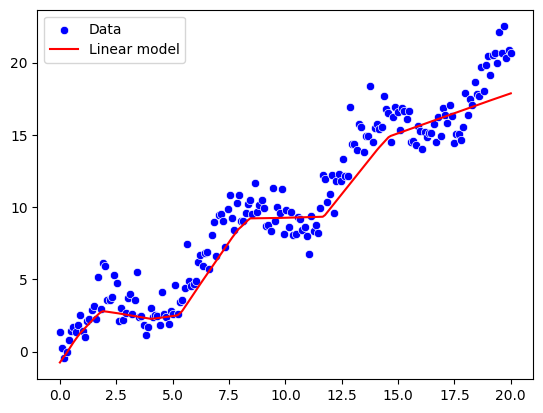

In [16]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
